In [161]:
# remotes::install_github(repo="phillipbvetter/ctsmTMB", dependencies=TRUE)

In [162]:
library(TMB)
library(ctsmTMB)
library(ggplot2)

In [163]:
ex1_overflow = read.csv("data/ex1_rainfallrunoff.csv")
head(ex1_overflow)

,timestamp,rainfall,stormwater
,<chr>,<dbl>,<dbl>
1,2024-04-01 08:00:00,0.003,0
2,2024-04-01 08:01:00,0.000,0
3,2024-04-01 08:02:00,0.000,0
4,2024-04-01 08:03:00,0.000,0
5,2024-04-01 08:04:00,0.000,0
6,2024-04-01 08:05:00,0.000,0


In [164]:
# Convert timestamps to numeric time (hours since first observation)
ex1_overflow$t <- as.numeric(
  difftime(as.POSIXct(ex1_overflow$timestamp),
           as.POSIXct(ex1_overflow$timestamp[1]),
           units = "hours")
)

head(ex1_overflow)

,timestamp,rainfall,stormwater,t
,<chr>,<dbl>,<dbl>,<dbl>
1,2024-04-01 08:00:00,0.003,0,0.00000000
2,2024-04-01 08:01:00,0.000,0,0.01666667
3,2024-04-01 08:02:00,0.000,0,0.03333333
4,2024-04-01 08:03:00,0.000,0,0.05000000
5,2024-04-01 08:04:00,0.000,0,0.06666667
6,2024-04-01 08:05:00,0.000,0,0.08333333


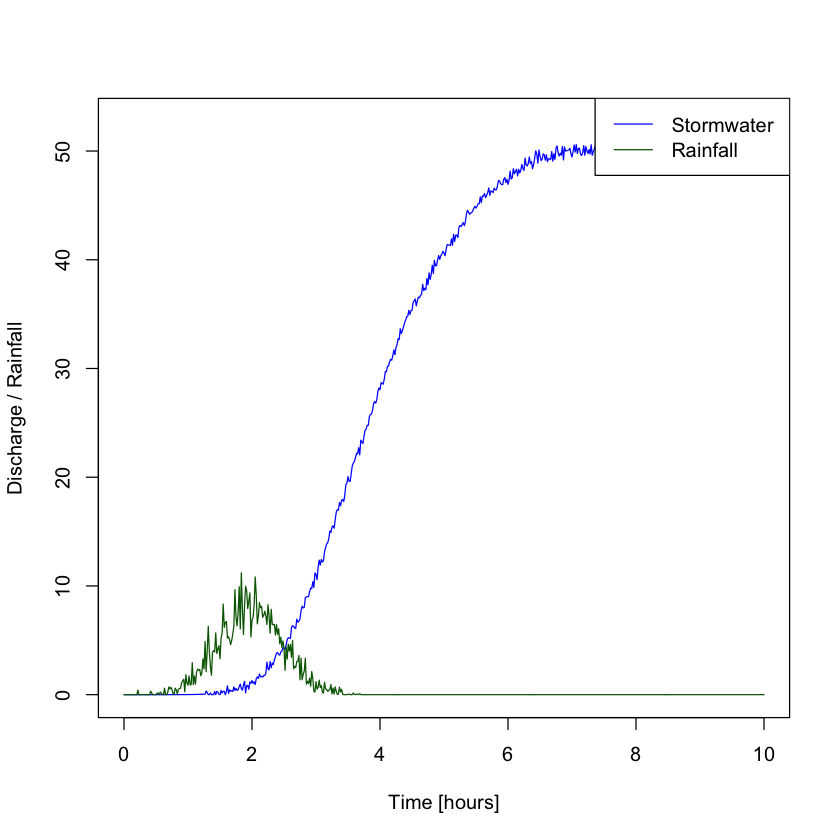

In [165]:
# Plot rainfall and stormwater for ex2_overflow
plot(ex1_overflow$t, ex1_overflow$stormwater, type = "l", col = "blue",
     xlab = "Time [hours]", ylab = "Discharge / Rainfall")

lines(ex1_overflow$t, ex1_overflow$rainfall, col = "darkgreen")

legend("topright", legend = c("Stormwater", "Rainfall"),
       col = c("blue", "darkgreen"), lty = 1)


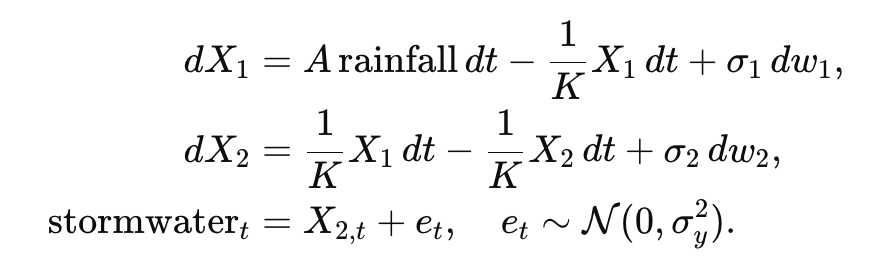

sigma1=sigma2=sigmax

In [166]:
# m <- ctsmTMB$new()

# m$addSystem(
#   dX1 ~ A * rainfall * dt - (1/K) * X1 * dt + sigma_1 * dw1,
#   dX2 ~ (1/K) * X1 * dt + sigma_2 * dw2
# )
# m$addObs(stormwater ~ X2)
# m$setVariance(stormwater ~ sigma_y^2)
# m$addInput(rainfall)

# m$setParameter(
#   A      = c(initial = 1,   lower = 1e-6, upper = 1e3),
#   K      = c(initial = 10,  lower = 1e-6, upper = 1e4),
#   sigma_1 = c(initial = 0.1, lower = 1e-8, upper = 10),
#   sigma_2 = c(initial = 0.1, lower = 1e-8, upper = 10),
#   sigma_y= c(initial = 0.1, lower = 1e-8, upper = 10)
# )

# # Proper initial state specification (mean + covariance)
# m$setInitialState(list(
#   x0 = c(X1 = 0, X2 = 0),
#   p0 = diag(2) * 0.01
# ))

# fit <- m$estimate(data = ex1_overflow)

# summary(fit)

# loglik_val <- fit$getLikelihood
# cat("\nLogLik:", loglik_val, "\n")

# cat("K:", fit$par["K"], "  A:", fit$par["A"], "\n")

In [167]:
# This model only considers one same variance for both states (reservoirs)

m <- ctsmTMB$new()

m$addSystem(
  dX1 ~ A * rainfall * dt - (1/K) * X1 * dt + sigma_x * dw1,
  dX2 ~ (1/K) * X1 * dt + sigma_x * dw2
)
m$addObs(stormwater ~ X2)
m$setVariance(stormwater ~ sigma_y^2)
m$addInput(rainfall)

m$setParameter(
  A      = c(initial = 1,   lower = 1e-6, upper = 1e3),
  K      = c(initial = 10,  lower = 1e-6, upper = 1e4),
  sigma_x = c(initial = 0.1, lower = 1e-8, upper = 10),
  sigma_y= c(initial = 0.1, lower = 1e-8, upper = 10)
)

# Proper initial state specification (mean + covariance)
m$setInitialState(list(
  x0 = c(X1 = 0, X2 = 0),
  p0 = diag(2) * 0.01
))

fit <- m$estimate(data = ex1_overflow)

summary(fit)

loglik_val <- fit$getLikelihood
cat("\nLogLik:", loglik_val, "\n")

cat("K:", fit$par["K"], "  A:", fit$par["A"], "\n")
-fit$nll

Checking model components...

Checking and setting data...

Constructing objective function and derivative tables...

Minimizing the negative log-likelihood...



  0:     26737.642:  1.00000  10.0000 0.100000 0.100000
 10:     230.50642:  8.40884  5.09717  1.32316 0.258392
 20:     217.62683:  6.24496  2.98180  1.08238 0.268672


	 Optimization finished!:
            Elapsed time: 0.034 seconds.
            The objective value is: 2.176268e+02
            The maximum gradient component is: 3.7e-04
            The convergence message is: relative convergence (4)
            Iterations: 22
            Evaluations: Fun: 32 Grad: 23
            See stats::nlminb for available tolerance/control arguments.

Returning results...

Finished!



Coefficent Matrix 
        Estimate Std. Error t value  Pr(>|t|)    
A       6.244946   0.465387  13.419 < 2.2e-16 ***
K       2.981866   0.289410  10.303 < 2.2e-16 ***
sigma_x 1.082413   0.077299  14.003 < 2.2e-16 ***
sigma_y 0.268672   0.009737  27.593 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

LogLik: 
K: 2.981866   A: 6.244946 


[1] -217.6268

In [168]:
data <- ex1_overflow
pars <- fit$par

In [169]:
pars["A"]
pars["K"]
pars["sigma_x"]
pars["sigma_1"]
pars["sigma_2"]
pars["sigma_y"]

A 
6.244946

K 
2.981866

sigma_x 
1.082413

<NA> 
  NA

<NA> 
  NA

sigma_y 
0.2686722

time  observed simulated  rainfall 
        0         0         0         0

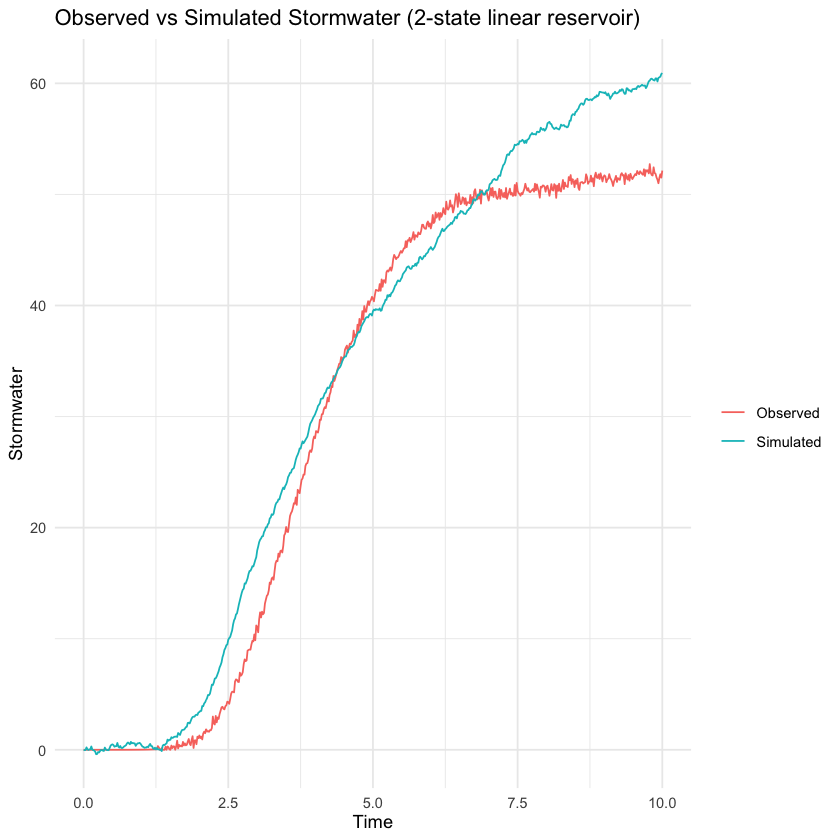

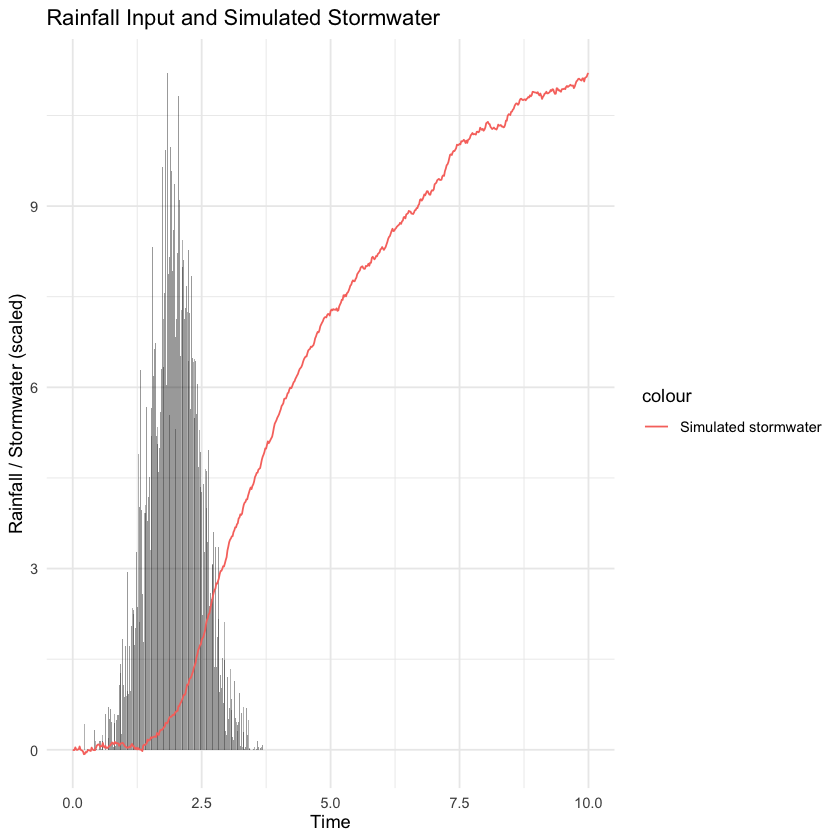

In [170]:
library(ggplot2)

# ---- Use your data frame and fitted model ----


# Extract parameter estimates (note the underscores!)
A       <- pars["A"]
K       <- pars["K"]
sigma1 <- pars["sigma_x"]
sigma2 <- pars["sigma_x"]
sigma_y <- pars["sigma_y"]

# A <- 6.2798
# K <- 2.9542
# sigma_x <- 1.0207
# sigma_y <- 0.27065

# ---- Time vector (must match what was used in estimation) ----
if ("t" %in% names(data)) {
  time_num <- as.numeric(data$t)
} else if ("time" %in% names(data)) {
  time_num <- as.numeric(data$time)
} else if ("timestamp" %in% names(data)) {
  time_num <- as.numeric(
    difftime(as.POSIXct(data$timestamp),
             as.POSIXct(data$timestamp[1]),
             units = "hours")
  )
} else {
  # fallback: equally spaced steps
  time_num <- seq_len(nrow(data))
}
n <- length(time_num)

# ---- Input (rainfall) ----
rain <- data$rainfall
rain[!is.finite(rain)] <- 0      # avoid NAs/Inf feeding into the SDE

# ---- Simulate SDE with Euler–Maruyama ----
x1 <- numeric(n)
x2 <- numeric(n)

x1[1] <- 0
x2[1] <- 0

set.seed(123)
if (n > 1) {
  for (i in 2:n) {
    dt_i <- time_num[i] - time_num[i-1]
    stopifnot(is.finite(dt_i) && dt_i > 0)

    # Brownian increments
    dw1 <- rnorm(1, 0, sqrt(dt_i))
    dw2 <- rnorm(1, 0, sqrt(dt_i))

    # X1: dX1 = A * rain - (1/K) * X1 + sigma1 dW1
    x1[i] <- x1[i-1] +
      (A * rain[i] - (1 / K) * x1[i-1]) * dt_i +
      sigma1 * dw1

    # X2: dX2 = (1/K) * X1 + sigma2 dW2  (NO -1/K * X2 term!)
    x2[i] <- x2[i-1] +
      ((1 / K) * x1[i-1]) * dt_i +
      sigma2 * dw2
  }
}

stormwater_sim <- x2   # compare latent X2 to observed stormwater

# ---- Combine for plotting ----
df_plot <- data.frame(
  time      = time_num,
  observed  = data$stormwater,
  simulated = stormwater_sim,
  rainfall  = rain
)

# check for NAs
sapply(df_plot, function(col) sum(!is.finite(col)))

# ---- Plot: observed vs simulated stormwater ----
ggplot(df_plot, aes(x = time)) +
  geom_line(aes(y = observed,  color = "Observed")) +
  geom_line(aes(y = simulated, color = "Simulated")) +
  labs(title = "Observed vs Simulated Stormwater (2-state linear reservoir)",
       y = "Stormwater", x = "Time", color = "") +
  theme_minimal()

# ---- Optional: rainfall overlay ----
ggplot(df_plot, aes(x = time)) +
  geom_col(aes(y = rainfall), fill = "black", alpha = 0.4) +
  geom_line(aes(y = simulated / max(simulated, na.rm = TRUE) *
                    max(rainfall, na.rm = TRUE),
                color = "Simulated stormwater")) +
  labs(title = "Rainfall Input and Simulated Stormwater",
       y = "Rainfall / Stormwater (scaled)", x = "Time") +
  theme_minimal()


## 2.1.2

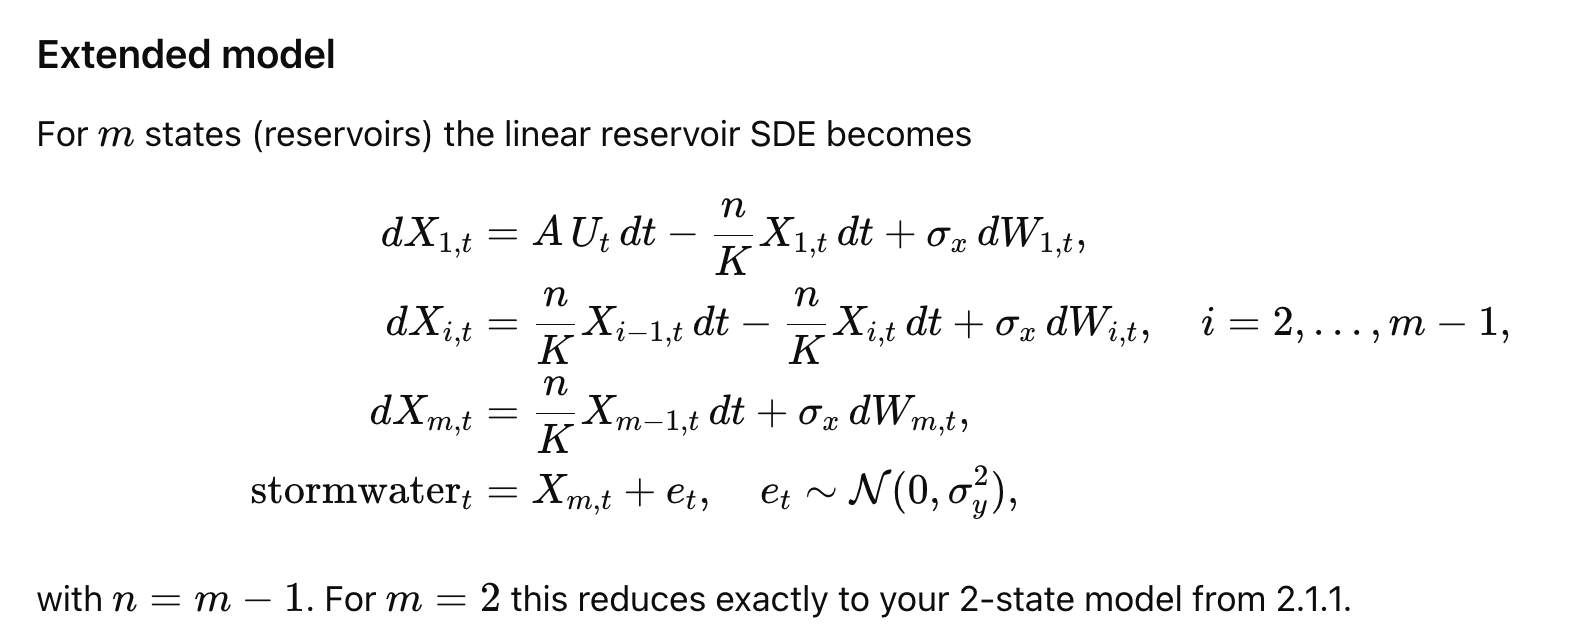

In [171]:
dat <- ex1_overflow

param_setup <- function(mdl) {
  mdl$setParameter(
    A       = c(initial = 1,   lower = 1e-6, upper = 1e3),
    K       = c(initial = 3,   lower = 1e-6, upper = 1e4),
    sigma_x = c(initial = 0.5, lower = 1e-8, upper = 10),
    sigma_y = c(initial = 0.2, lower = 1e-8, upper = 10)
  )
}

init_state <- function(mdl, n) {
  m  <- n + 1                      # number of reservoirs/states
  x0 <- setNames(rep(0, m), paste0("X", 1:m))
  p0 <- diag(m) * 0.01
  mdl$setInitialState(list(x0 = x0, p0 = p0))
}

info <- function(fit, n) {
  ll  <- fit$getLikelihood
  k   <- length(fit$par)
  AIC <- -2 * ll + 2 * k
  BIC <- -2 * ll + log(nrow(dat)) * k
  data.frame(n = n, states = n + 1, logLik = ll, k = k, AIC = AIC, BIC = BIC)
}

In [172]:
m <- ctsmTMB$new()

m$addSystem(
  dX1 ~ A * rainfall * dt - (1/K) * X1 * dt + sigma_x * dw1,
  dX2 ~ (1/K) * X1 * dt + sigma_x * dw2
)
m$addObs(stormwater ~ X2)
m$setVariance(stormwater ~ sigma_y^2)
m$addInput(rainfall)

m$setParameter(
  A      = c(initial = 1,   lower = 1e-6, upper = 1e3),
  K      = c(initial = 10,  lower = 1e-6, upper = 1e4),
  sigma_x = c(initial = 0.1, lower = 1e-8, upper = 10),
  sigma_y= c(initial = 0.1, lower = 1e-8, upper = 10)
)

# Proper initial state specification (mean + covariance)
m$setInitialState(list(
  x0 = c(X1 = 0, X2 = 0),
  p0 = diag(2) * 0.01
))

fit <- m$estimate(data = ex1_overflow)

summary(fit)

loglik_val <- fit$getLikelihood
cat("\nLogLik:", loglik_val, "\n")

cat("K:", fit$par["K"], "  A:", fit$par["A"], "\n")

Checking model components...

Checking and setting data...

Constructing objective function and derivative tables...

Minimizing the negative log-likelihood...



  0:     26737.642:  1.00000  10.0000 0.100000 0.100000
 10:     230.50642:  8.40884  5.09717  1.32316 0.258392
 20:     217.62683:  6.24496  2.98180  1.08238 0.268672


	 Optimization finished!:
            Elapsed time: 0.036 seconds.
            The objective value is: 2.176268e+02
            The maximum gradient component is: 3.7e-04
            The convergence message is: relative convergence (4)
            Iterations: 22
            Evaluations: Fun: 32 Grad: 23
            See stats::nlminb for available tolerance/control arguments.

Returning results...

Finished!



Coefficent Matrix 
        Estimate Std. Error t value  Pr(>|t|)    
A       6.244946   0.465387  13.419 < 2.2e-16 ***
K       2.981866   0.289410  10.303 < 2.2e-16 ***
sigma_x 1.082413   0.077299  14.003 < 2.2e-16 ***
sigma_y 0.268672   0.009737  27.593 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

LogLik: 
K: 2.981866   A: 6.244946 


In [173]:
# 2 states

m2 <- ctsmTMB$new()

m2$addSystem(
  dX1 ~ A * rainfall * dt - (2/K) * X1 * dt + sigma_x * dw1,
  dX2 ~ (2/K) * X1 * dt - (2/K) * X2 * dt + sigma_x * dw2,
  dX3 ~ (2/K) * X2 * dt + sigma_x * dw3
)
m2$addObs(stormwater ~ X3)
m2$setVariance(stormwater ~ sigma_y^2)
m2$addInput(rainfall)

m2$setParameter(
  A      = c(initial = 1,   lower = 1e-6, upper = 1e3),
  K      = c(initial = 10,  lower = 1e-6, upper = 1e4),
  sigma_x = c(initial = 0.1, lower = 1e-8, upper = 10),
  sigma_y= c(initial = 0.1, lower = 1e-8, upper = 10)
)

# Proper initial state specification (mean + covariance)
m2$setInitialState(list(
  x0 = c(X1 = 0, X2 = 0, X3 = 0),
  p0 = diag(3) * 0.01
))

fit2 <- m2$estimate(data = ex1_overflow)

summary(fit2)

loglik_val <- fit2$getLikelihood
cat("\nLogLik:", loglik_val, "\n")

cat("K:", fit2$par["K"], "  A:", fit2$par["A"], "\n")

Checking model components...

Checking and setting data...

Constructing objective function and derivative tables...

Minimizing the negative log-likelihood...



  0:     24631.205:  1.00000  10.0000 0.100000 0.100000
 10:     231.27542:  7.27193  3.65059  1.60204 0.256526
 20:     168.94550:  5.54335  2.18754 0.595064 0.286266


	 Optimization finished!:
            Elapsed time: 0.079 seconds.
            The objective value is: 1.676739e+02
            The maximum gradient component is: 4.8e-05
            The convergence message is: relative convergence (4)
            Iterations: 28
            Evaluations: Fun: 47 Grad: 29
            See stats::nlminb for available tolerance/control arguments.

Returning results...

Finished!



Coefficent Matrix 
         Estimate Std. Error t value  Pr(>|t|)    
A       5.6120889  0.2020983 27.7691 < 2.2e-16 ***
K       2.2503999  0.0741927 30.3318 < 2.2e-16 ***
sigma_x 0.5180620  0.0547357  9.4648 < 2.2e-16 ***
sigma_y 0.2834951  0.0090276 31.4030 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

LogLik: 
K: 2.2504   A: 5.612089 


Number of reservoirs (n): 2 
Number of state variables: 3 


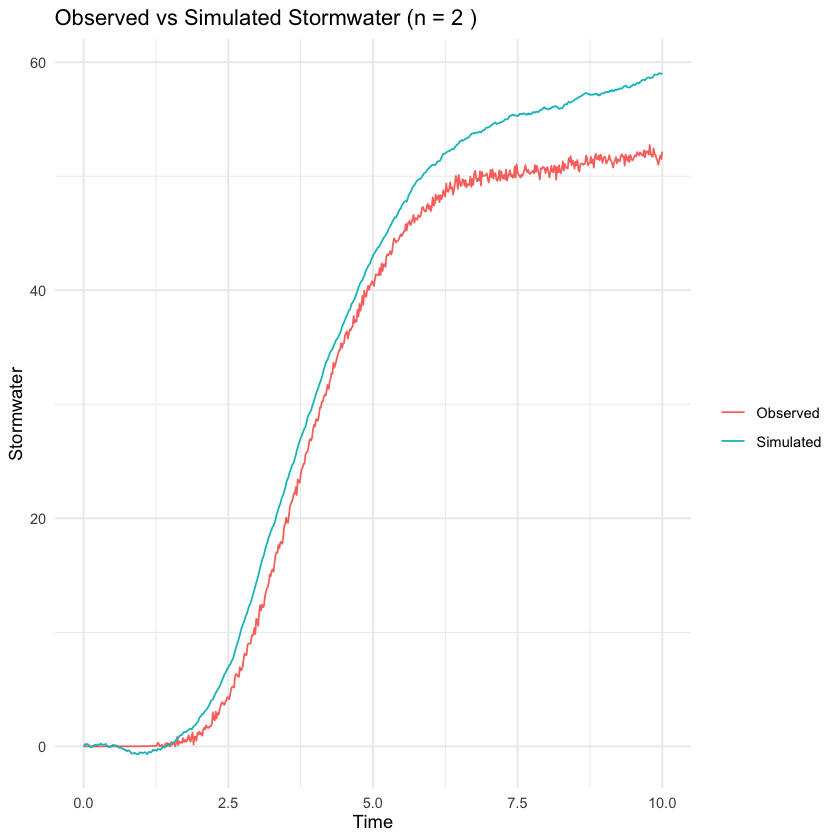

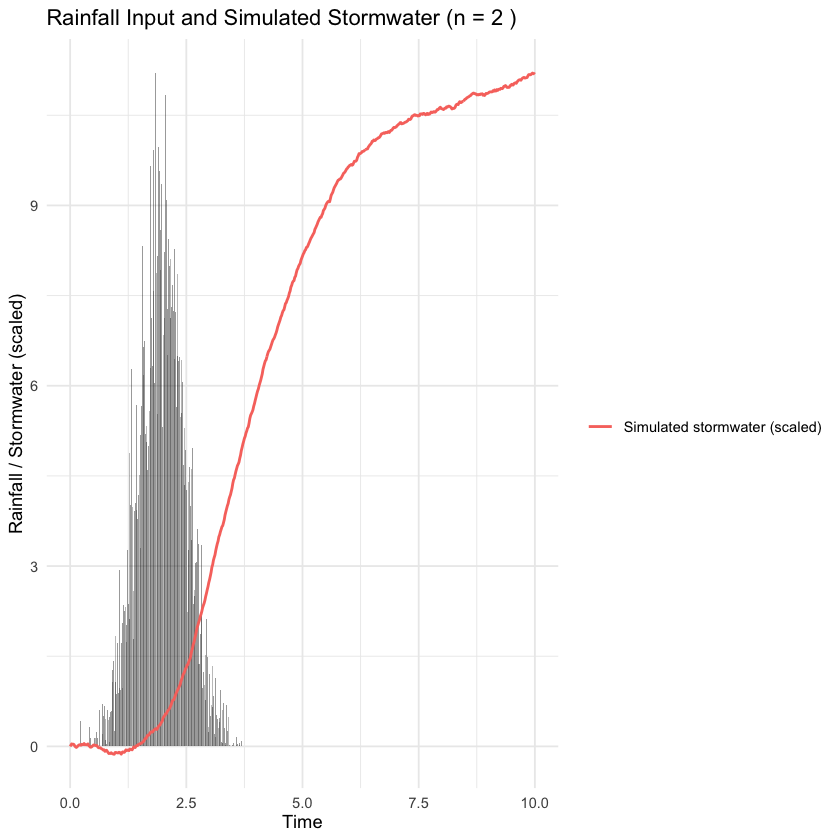

In [174]:
library(ggplot2)

## ---- Choose n and corresponding fitted model -------------------------
# n is the "number of states" in the assignment sense
# n = 1 → 2 reservoirs (X1, X2)
# n = 2 → 3 reservoirs (X1, X2, X3)
# ...
n     <- 2          # set this to 1,2,3,4,5,6 depending on which model
fit_n <- fit2       # set this to the corresponding fit object (fit, fit3, fit4, ...)

data <- ex1_overflow

n_states <- n + 1   # number of reservoirs X1..X_{n+1}
cat("Number of reservoirs (n):", n, "\n")
cat("Number of state variables:", n_states, "\n")

## ---- Coefficients from your ctsmTMB fit ------------------------------
pars    <- fit_n$par
A       <- pars["A"]
K       <- pars["K"]
sigma_x <- pars["sigma_x"]
sigma_y <- pars["sigma_y"]   # not used in the EM sim, but kept for completeness

## ---- Time handling (match what was used in estimation) ---------------
if ("t" %in% names(data)) {
  time <- data$t
} else if ("time" %in% names(data)) {
  time <- data$time
} else if ("timestamp" %in% names(data)) {
  time <- as.numeric(
    difftime(as.POSIXct(data$timestamp),
             as.POSIXct(data$timestamp[1]),
             units = "hours")
  )
} else {
  # fallback: equally spaced index
  time <- seq_len(nrow(data))
}

time_num <- as.numeric(time)
n_t      <- length(time_num)

## ---- Input (rainfall) -------------------------------------------------
rain <- data$rainfall
rain[!is.finite(rain)] <- 0

## ---- State matrix: rows = time, cols = X1..X_{n+1} -------------------
X <- matrix(0, nrow = n_t, ncol = n_states)
colnames(X) <- paste0("X", 1:n_states)

set.seed(123)

## ---- Euler–Maruyama simulation matching your SDE structure -----------
for (i in 2:n_t) {
  dt_i <- time_num[i] - time_num[i - 1]
  stopifnot(is.finite(dt_i) && dt_i > 0)

  # Brownian increments for each state
  dw <- rnorm(n_states, mean = 0, sd = sqrt(dt_i))

  # previous state vector
  X_prev <- X[i - 1, ]

  # 1) First reservoir:
  # dX1 = A * rain - (n/K) * X1 + sigma_x * dW1
  X[i, 1] <- X_prev[1] +
    (A * rain[i] - (n / K) * X_prev[1]) * dt_i +
    sigma_x * dw[1]

  # 2) Middle reservoirs (if any):
  # dXk = (n/K) * X_{k-1} - (n/K) * X_k + sigma_x * dWk,  k = 2,...,n
  if (n_states > 2) {
    for (k in 2:n_states) {
      if (k < n_states) {
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1] - (n / K) * X_prev[k]) * dt_i +
          sigma_x * dw[k]
      } else {
        # 3) Last reservoir X_{n+1}:
        # dX_{n+1} = (n/K) * X_n + sigma_x * dW_{n+1}
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1]) * dt_i +
          sigma_x * dw[k]
      }
    }
  }
}

## ---- Compare last reservoir to observed stormwater -------------------
stormwater_sim <- X[, n_states]

df_plot <- data.frame(
  time      = time_num,
  observed  = data$stormwater,
  simulated = stormwater_sim,
  rainfall  = data$rainfall
)

## ---- Plot 1: Observed vs simulated stormwater ------------------------
ggplot(df_plot, aes(x = time)) +
  geom_line(aes(y = observed,  color = "Observed")) +
  geom_line(aes(y = simulated, color = "Simulated")) +
  labs(title = paste("Observed vs Simulated Stormwater (n =", n, ")"),
       y = "Stormwater", x = "Time", color = "") +
  theme_minimal()

## ---- Plot 2: Rainfall + simulated stormwater -------------------------
sim_scaled <- stormwater_sim / max(stormwater_sim, na.rm = TRUE) *
              max(df_plot$rainfall, na.rm = TRUE)
df_plot$sim_scaled <- sim_scaled

ggplot(df_plot, aes(x = time)) +
  geom_col(aes(y = rainfall), fill = "black", alpha = 0.4) +
  geom_line(aes(y = sim_scaled, color = "Simulated stormwater (scaled)"),
            linewidth = 0.8) +
  labs(title = paste("Rainfall Input and Simulated Stormwater (n =", n, ")"),
       y = "Rainfall / Stormwater (scaled)", x = "Time", color = "") +
  theme_minimal()


In [175]:
# 3 states (n = 3 → 4 reservoirs: X1, X2, X3, X4)

m3 <- ctsmTMB$new()

m3$addSystem(
  dX1 ~ A * rainfall * dt - (3/K) * X1 * dt + sigma_x * dw1,
  dX2 ~ (3/K) * X1 * dt - (3/K) * X2 * dt + sigma_x * dw2,
  dX3 ~ (3/K) * X2 * dt - (3/K) * X3 * dt + sigma_x * dw3,
  dX4 ~ (3/K) * X3 * dt                 + sigma_x * dw4
)
m3$addObs(stormwater ~ X4)
m3$setVariance(stormwater ~ sigma_y^2)
m3$addInput(rainfall)

m3$setParameter(
  A       = c(initial = 1,   lower = 1e-6, upper = 1e3),
  K       = c(initial = 10,  lower = 1e-6, upper = 1e4),
  sigma_x = c(initial = 0.1, lower = 1e-8, upper = 10),
  sigma_y = c(initial = 0.1, lower = 1e-8, upper = 10)
)

# Proper initial state specification (mean + covariance)
m3$setInitialState(list(
  x0 = c(X1 = 0, X2 = 0, X3 = 0, X4 = 0),
  p0 = diag(4) * 0.01
))

fit3 <- m3$estimate(data = ex1_overflow)

summary(fit3)

loglik_val3 <- fit3$getLikelihood
cat("\nLogLik (n=3):", loglik_val3, "\n")
cat("K:", fit3$par["K"], "  A:", fit3$par["A"], "\n")


Checking model components...

Checking and setting data...

Constructing objective function and derivative tables...

Minimizing the negative log-likelihood...



  0:     22223.641:  1.00000  10.0000 0.100000 0.100000
 10:     223.34193:  3.95384  2.42757  1.59676 0.251596
 20:     151.86994:  5.15731  2.03352 0.278894 0.292756


	 Optimization finished!:
            Elapsed time: 0.112 seconds.
            The objective value is: 1.508462e+02
            The maximum gradient component is: 4.9e-05
            The convergence message is: relative convergence (4)
            Iterations: 29
            Evaluations: Fun: 47 Grad: 30
            See stats::nlminb for available tolerance/control arguments.

Returning results...

Finished!



Coefficent Matrix 
         Estimate Std. Error t value  Pr(>|t|)    
A       5.0578408  0.1100501  45.959 < 2.2e-16 ***
K       2.0560482  0.0365468  56.258 < 2.2e-16 ***
sigma_x 0.2769054  0.0492540   5.622 2.901e-08 ***
sigma_y 0.2908643  0.0090439  32.161 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

LogLik (n=3): 
K: 2.056048   A: 5.057841 


Number of reservoirs (n): 3 
Number of state variables: 4 


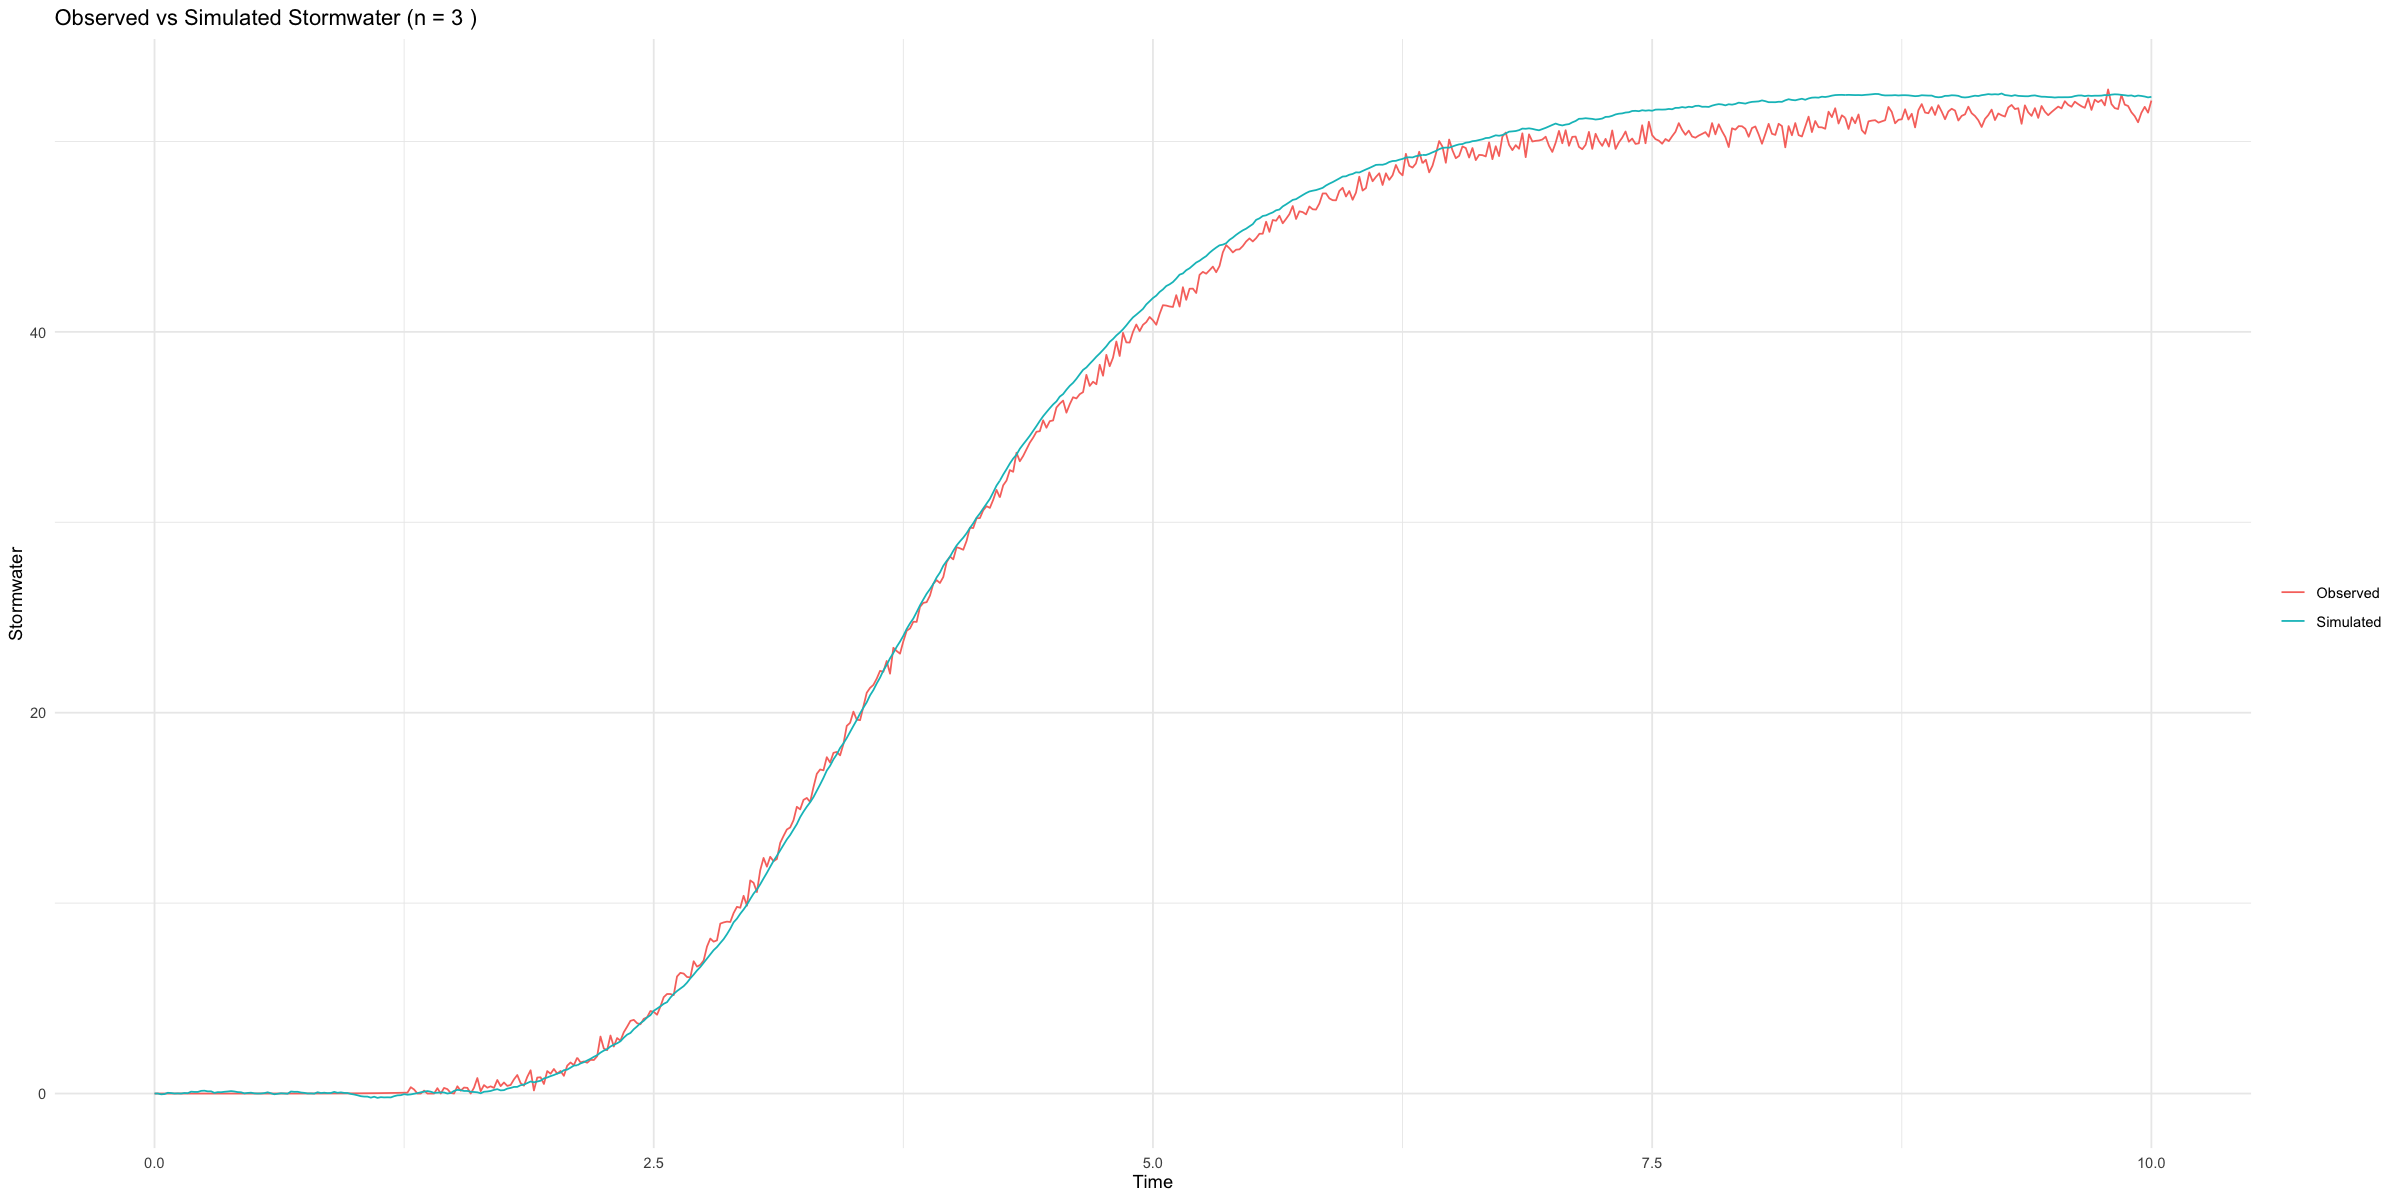

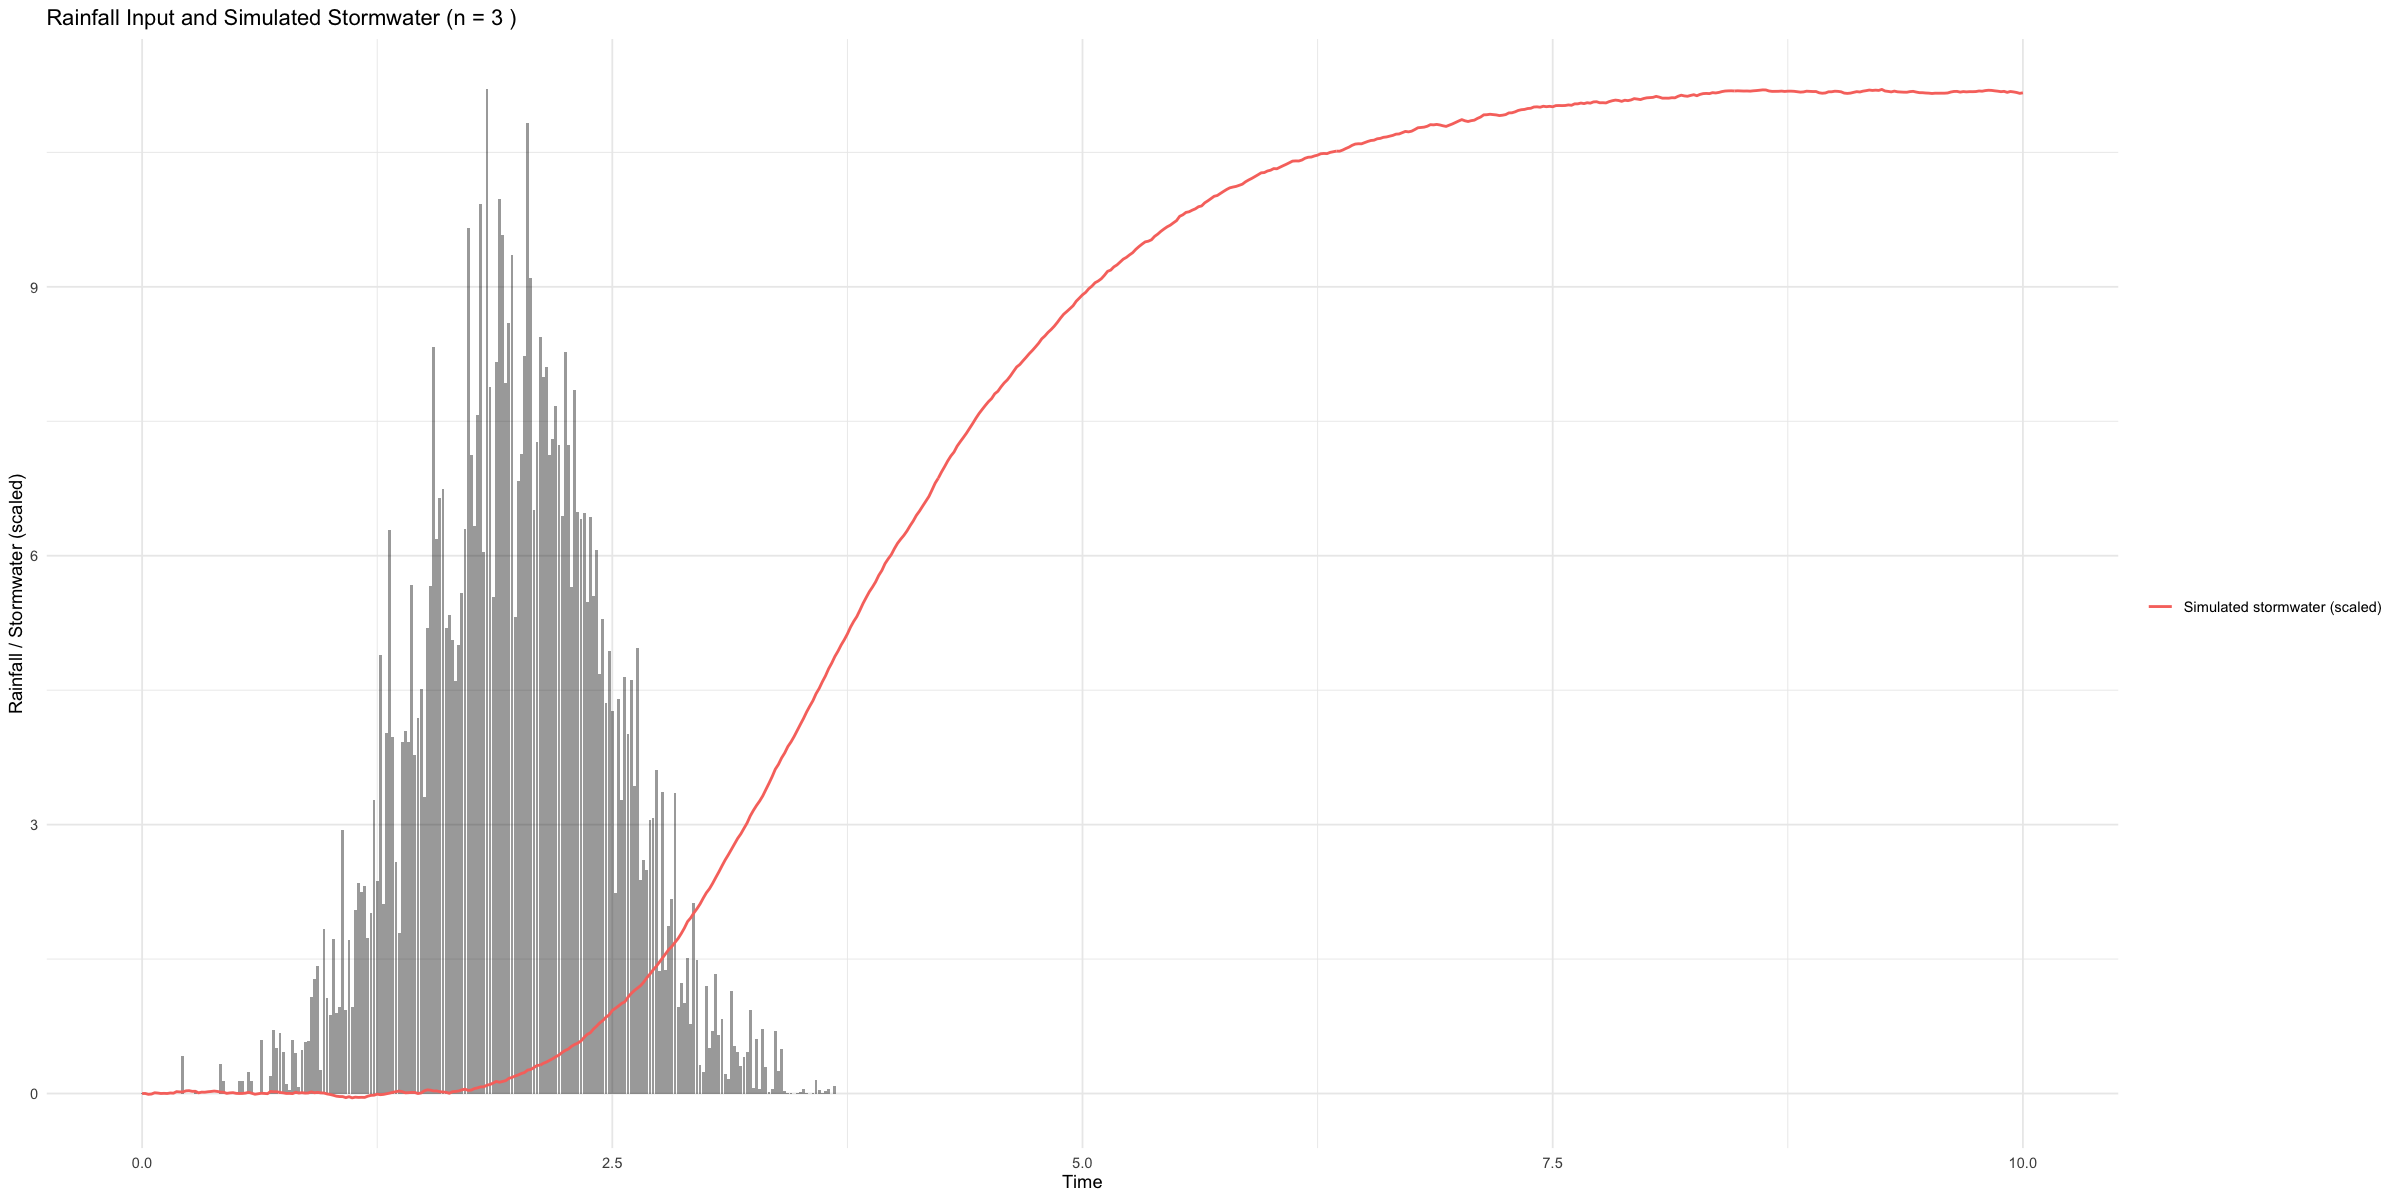

In [176]:
library(ggplot2)

options(repr.plot.width = 20, repr.plot.height = 10)

## ---- Choose n and corresponding fitted model -------------------------
# n is the "number of states" in the assignment sense
# n = 1 → 2 reservoirs (X1, X2)
# n = 2 → 3 reservoirs (X1, X2, X3)
# ...
n     <- 3          # set this to 1,2,3,4,5,6 depending on which model
fit_n <- fit3       # set this to the corresponding fit object (fit, fit3, fit4, ...)

data <- ex1_overflow

n_states <- n + 1   # number of reservoirs X1..X_{n+1}
cat("Number of reservoirs (n):", n, "\n")
cat("Number of state variables:", n_states, "\n")

## ---- Coefficients from your ctsmTMB fit ------------------------------
pars    <- fit_n$par
A       <- pars["A"]
K       <- pars["K"]
sigma_x <- pars["sigma_x"]
sigma_y <- pars["sigma_y"]   # not used in the EM sim, but kept for completeness

## ---- Time handling (match what was used in estimation) ---------------
if ("t" %in% names(data)) {
  time <- data$t
} else if ("time" %in% names(data)) {
  time <- data$time
} else if ("timestamp" %in% names(data)) {
  time <- as.numeric(
    difftime(as.POSIXct(data$timestamp),
             as.POSIXct(data$timestamp[1]),
             units = "hours")
  )
} else {
  # fallback: equally spaced index
  time <- seq_len(nrow(data))
}

time_num <- as.numeric(time)
n_t      <- length(time_num)

## ---- Input (rainfall) -------------------------------------------------
rain <- data$rainfall
rain[!is.finite(rain)] <- 0

## ---- State matrix: rows = time, cols = X1..X_{n+1} -------------------
X <- matrix(0, nrow = n_t, ncol = n_states)
colnames(X) <- paste0("X", 1:n_states)

set.seed(123)

## ---- Euler–Maruyama simulation matching your SDE structure -----------
for (i in 2:n_t) {
  dt_i <- time_num[i] - time_num[i - 1]
  stopifnot(is.finite(dt_i) && dt_i > 0)

  # Brownian increments for each state
  dw <- rnorm(n_states, mean = 0, sd = sqrt(dt_i))

  # previous state vector
  X_prev <- X[i - 1, ]

  # 1) First reservoir:
  # dX1 = A * rain - (n/K) * X1 + sigma_x * dW1
  X[i, 1] <- X_prev[1] +
    (A * rain[i] - (n / K) * X_prev[1]) * dt_i +
    sigma_x * dw[1]

  # 2) Middle reservoirs (if any):
  # dXk = (n/K) * X_{k-1} - (n/K) * X_k + sigma_x * dWk,  k = 2,...,n
  if (n_states > 2) {
    for (k in 2:n_states) {
      if (k < n_states) {
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1] - (n / K) * X_prev[k]) * dt_i +
          sigma_x * dw[k]
      } else {
        # 3) Last reservoir X_{n+1}:
        # dX_{n+1} = (n/K) * X_n + sigma_x * dW_{n+1}
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1]) * dt_i +
          sigma_x * dw[k]
      }
    }
  }
}

## ---- Compare last reservoir to observed stormwater -------------------
stormwater_sim <- X[, n_states]

df_plot <- data.frame(
  time      = time_num,
  observed  = data$stormwater,
  simulated = stormwater_sim,
  rainfall  = data$rainfall
)

## ---- Plot 1: Observed vs simulated stormwater ------------------------
ggplot(df_plot, aes(x = time)) +
  geom_line(aes(y = observed,  color = "Observed")) +
  geom_line(aes(y = simulated, color = "Simulated")) +
  labs(title = paste("Observed vs Simulated Stormwater (n =", n, ")"),
       y = "Stormwater", x = "Time", color = "") +
  theme_minimal()

## ---- Plot 2: Rainfall + simulated stormwater -------------------------
sim_scaled <- stormwater_sim / max(stormwater_sim, na.rm = TRUE) *
              max(df_plot$rainfall, na.rm = TRUE)
df_plot$sim_scaled <- sim_scaled

ggplot(df_plot, aes(x = time)) +
  geom_col(aes(y = rainfall), fill = "black", alpha = 0.4) +
  geom_line(aes(y = sim_scaled, color = "Simulated stormwater (scaled)"),
            linewidth = 0.8) +
  labs(title = paste("Rainfall Input and Simulated Stormwater (n =", n, ")"),
       y = "Rainfall / Stormwater (scaled)", x = "Time", color = "") +
  theme_minimal()


In [177]:
# 4 states (n = 4 → 5 reservoirs: X1, X2, X3, X4, X5)

m4 <- ctsmTMB$new()

m4$addSystem(
  dX1 ~ A * rainfall * dt - (4/K) * X1 * dt + sigma_x * dw1,
  dX2 ~ (4/K) * X1 * dt - (4/K) * X2 * dt + sigma_x * dw2,
  dX3 ~ (4/K) * X2 * dt - (4/K) * X3 * dt + sigma_x * dw3,
  dX4 ~ (4/K) * X3 * dt - (4/K) * X4 * dt + sigma_x * dw4,
  dX5 ~ (4/K) * X4 * dt                 + sigma_x * dw5
)
m4$addObs(stormwater ~ X5)
m4$setVariance(stormwater ~ sigma_y^2)
m4$addInput(rainfall)

m4$setParameter(
  A       = c(initial = 1,   lower = 1e-6, upper = 1e3),
  K       = c(initial = 10,  lower = 1e-6, upper = 1e4),
  sigma_x = c(initial = 0.1, lower = 1e-8, upper = 10),
  sigma_y = c(initial = 0.1, lower = 1e-8, upper = 10)
)

# Proper initial state specification (mean + covariance)
m4$setInitialState(list(
  x0 = c(X1 = 0, X2 = 0, X3 = 0, X4 = 0, X5 = 0),
  p0 = diag(5) * 0.01
))

fit4 <- m4$estimate(data = ex1_overflow)

summary(fit4)

loglik_val4 <- fit4$getLikelihood
cat("\nLogLik (n=4):", loglik_val4, "\n")
cat("K:", fit4$par["K"], "  A:", fit4$par["A"], "\n")


Checking model components...

Checking and setting data...

Constructing objective function and derivative tables...

Minimizing the negative log-likelihood...



  0:     19903.412:  1.00000  10.0000 0.100000 0.100000
 10:     231.67711:  2.71923  1.62144  1.63744 0.230860
 20:     160.87997:  4.64476  1.95948 0.395574 0.286667


	 Optimization finished!:
            Elapsed time: 0.139 seconds.
            The objective value is: 1.608798e+02
            The maximum gradient component is: 2.6e-04
            The convergence message is: relative convergence (4)
            Iterations: 25
            Evaluations: Fun: 46 Grad: 26
            See stats::nlminb for available tolerance/control arguments.

Returning results...

Finished!



Coefficent Matrix 
         Estimate Std. Error t value  Pr(>|t|)    
A       4.6439759  0.1623213 28.6098 < 2.2e-16 ***
K       1.9592206  0.0529644 36.9913 < 2.2e-16 ***
sigma_x 0.3960230  0.0501408  7.8982 1.365e-14 ***
sigma_y 0.2867944  0.0089776 31.9457 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

LogLik (n=4): 
K: 1.959221   A: 4.643976 


Number of reservoirs (n): 4 
Number of state variables: 5 


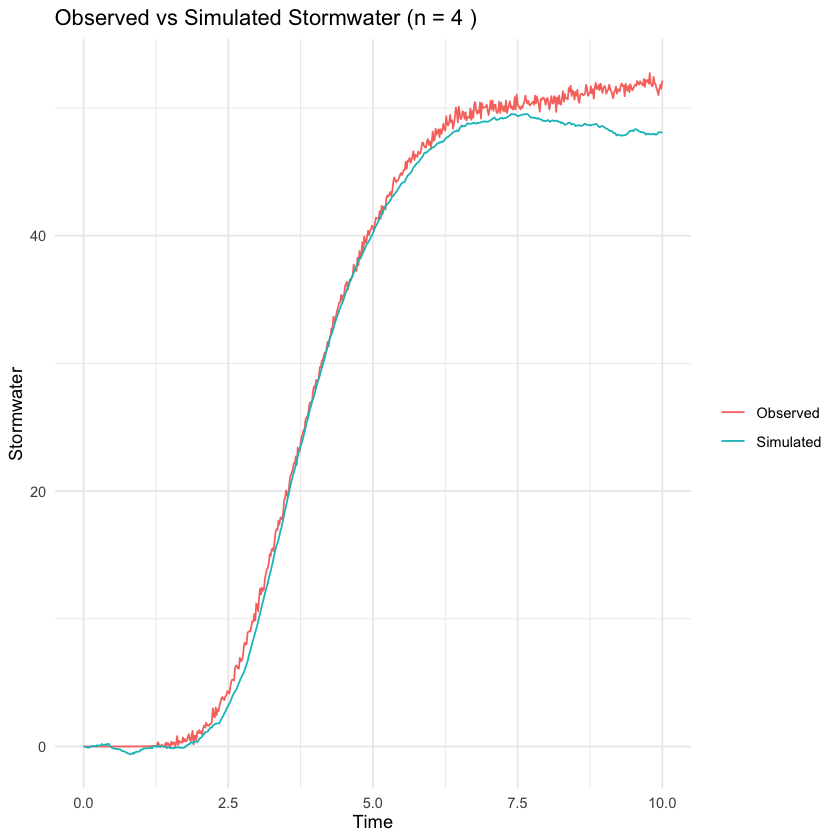

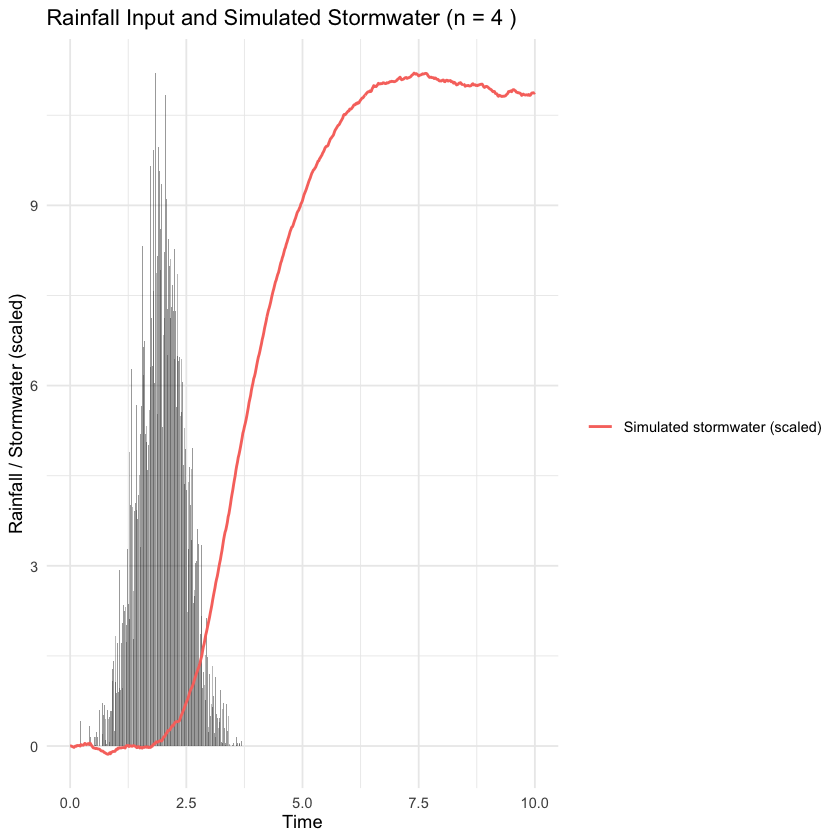

In [178]:
library(ggplot2)

## ---- Choose n and corresponding fitted model -------------------------
# n is the "number of states" in the assignment sense
# n = 1 → 2 reservoirs (X1, X2)
# n = 2 → 3 reservoirs (X1, X2, X3)
# ...
n     <- 4          # set this to 1,2,3,4,5,6 depending on which model
fit_n <- fit4       # set this to the corresponding fit object (fit, fit3, fit4, ...)

data <- ex1_overflow

n_states <- n + 1   # number of reservoirs X1..X_{n+1}
cat("Number of reservoirs (n):", n, "\n")
cat("Number of state variables:", n_states, "\n")

## ---- Coefficients from your ctsmTMB fit ------------------------------
pars    <- fit_n$par
A       <- pars["A"]
K       <- pars["K"]
sigma_x <- pars["sigma_x"]
sigma_y <- pars["sigma_y"]   # not used in the EM sim, but kept for completeness

## ---- Time handling (match what was used in estimation) ---------------
if ("t" %in% names(data)) {
  time <- data$t
} else if ("time" %in% names(data)) {
  time <- data$time
} else if ("timestamp" %in% names(data)) {
  time <- as.numeric(
    difftime(as.POSIXct(data$timestamp),
             as.POSIXct(data$timestamp[1]),
             units = "hours")
  )
} else {
  # fallback: equally spaced index
  time <- seq_len(nrow(data))
}

time_num <- as.numeric(time)
n_t      <- length(time_num)

## ---- Input (rainfall) -------------------------------------------------
rain <- data$rainfall
rain[!is.finite(rain)] <- 0

## ---- State matrix: rows = time, cols = X1..X_{n+1} -------------------
X <- matrix(0, nrow = n_t, ncol = n_states)
colnames(X) <- paste0("X", 1:n_states)

set.seed(123)

## ---- Euler–Maruyama simulation matching your SDE structure -----------
for (i in 2:n_t) {
  dt_i <- time_num[i] - time_num[i - 1]
  stopifnot(is.finite(dt_i) && dt_i > 0)

  # Brownian increments for each state
  dw <- rnorm(n_states, mean = 0, sd = sqrt(dt_i))

  # previous state vector
  X_prev <- X[i - 1, ]

  # 1) First reservoir:
  # dX1 = A * rain - (n/K) * X1 + sigma_x * dW1
  X[i, 1] <- X_prev[1] +
    (A * rain[i] - (n / K) * X_prev[1]) * dt_i +
    sigma_x * dw[1]

  # 2) Middle reservoirs (if any):
  # dXk = (n/K) * X_{k-1} - (n/K) * X_k + sigma_x * dWk,  k = 2,...,n
  if (n_states > 2) {
    for (k in 2:n_states) {
      if (k < n_states) {
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1] - (n / K) * X_prev[k]) * dt_i +
          sigma_x * dw[k]
      } else {
        # 3) Last reservoir X_{n+1}:
        # dX_{n+1} = (n/K) * X_n + sigma_x * dW_{n+1}
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1]) * dt_i +
          sigma_x * dw[k]
      }
    }
  }
}

## ---- Compare last reservoir to observed stormwater -------------------
stormwater_sim <- X[, n_states]

df_plot <- data.frame(
  time      = time_num,
  observed  = data$stormwater,
  simulated = stormwater_sim,
  rainfall  = data$rainfall
)

## ---- Plot 1: Observed vs simulated stormwater ------------------------
ggplot(df_plot, aes(x = time)) +
  geom_line(aes(y = observed,  color = "Observed")) +
  geom_line(aes(y = simulated, color = "Simulated")) +
  labs(title = paste("Observed vs Simulated Stormwater (n =", n, ")"),
       y = "Stormwater", x = "Time", color = "") +
  theme_minimal()

## ---- Plot 2: Rainfall + simulated stormwater -------------------------
sim_scaled <- stormwater_sim / max(stormwater_sim, na.rm = TRUE) *
              max(df_plot$rainfall, na.rm = TRUE)
df_plot$sim_scaled <- sim_scaled

ggplot(df_plot, aes(x = time)) +
  geom_col(aes(y = rainfall), fill = "black", alpha = 0.4) +
  geom_line(aes(y = sim_scaled, color = "Simulated stormwater (scaled)"),
            linewidth = 0.8) +
  labs(title = paste("Rainfall Input and Simulated Stormwater (n =", n, ")"),
       y = "Rainfall / Stormwater (scaled)", x = "Time", color = "") +
  theme_minimal()


In [179]:
# 5 states (n = 5 → 6 reservoirs: X1, X2, X3, X4, X5, X6)

m5 <- ctsmTMB$new()

m5$addSystem(
  dX1 ~ A * rainfall * dt - (5/K) * X1 * dt + sigma_x * dw1,
  dX2 ~ (5/K) * X1 * dt - (5/K) * X2 * dt + sigma_x * dw2,
  dX3 ~ (5/K) * X2 * dt - (5/K) * X3 * dt + sigma_x * dw3,
  dX4 ~ (5/K) * X3 * dt - (5/K) * X4 * dt + sigma_x * dw4,
  dX5 ~ (5/K) * X4 * dt - (5/K) * X5 * dt + sigma_x * dw5,
  dX6 ~ (5/K) * X5 * dt                 + sigma_x * dw6
)
m5$addObs(stormwater ~ X6)
m5$setVariance(stormwater ~ sigma_y^2)
m5$addInput(rainfall)

m5$setParameter(
  A       = c(initial = 1,   lower = 1e-6, upper = 1e3),
  K       = c(initial = 10,  lower = 1e-6, upper = 1e4),
  sigma_x = c(initial = 0.1, lower = 1e-8, upper = 10),
  sigma_y = c(initial = 0.1, lower = 1e-8, upper = 10)
)

# Proper initial state specification (mean + covariance)
m5$setInitialState(list(
  x0 = c(X1 = 0, X2 = 0, X3 = 0, X4 = 0, X5 = 0, X6 = 0),
  p0 = diag(6) * 0.01
))

fit5 <- m5$estimate(data = ex1_overflow)

summary(fit5)

loglik_val5 <- fit5$getLikelihood
cat("\nLogLik (n=5):", loglik_val5, "\n")
cat("K:", fit5$par["K"], "  A:", fit5$par["A"], "\n")


Checking model components...

Checking and setting data...

Constructing objective function and derivative tables...

Minimizing the negative log-likelihood...



  0:     17816.960:  1.00000  10.0000 0.100000 0.100000
 10:     235.85554:  2.67762  3.52637  1.48929 0.253659
 20:     168.44222:  4.37121  1.90511 0.462863 0.284948


	 Optimization finished!:
            Elapsed time: 0.177 seconds.
            The objective value is: 1.684285e+02
            The maximum gradient component is: 1.5e-05
            The convergence message is: relative convergence (4)
            Iterations: 27
            Evaluations: Fun: 41 Grad: 28
            See stats::nlminb for available tolerance/control arguments.

Returning results...

Finished!



Coefficent Matrix 
         Estimate Std. Error t value  Pr(>|t|)    
A       4.3405646  0.1974690  21.981 < 2.2e-16 ***
K       1.9001177  0.0650344  29.217 < 2.2e-16 ***
sigma_x 0.4651222  0.0519227   8.958 < 2.2e-16 ***
sigma_y 0.2848226  0.0089896  31.683 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

LogLik (n=5): 
K: 1.900118   A: 4.340565 


Number of reservoirs (n): 5 


Number of state variables: 6 


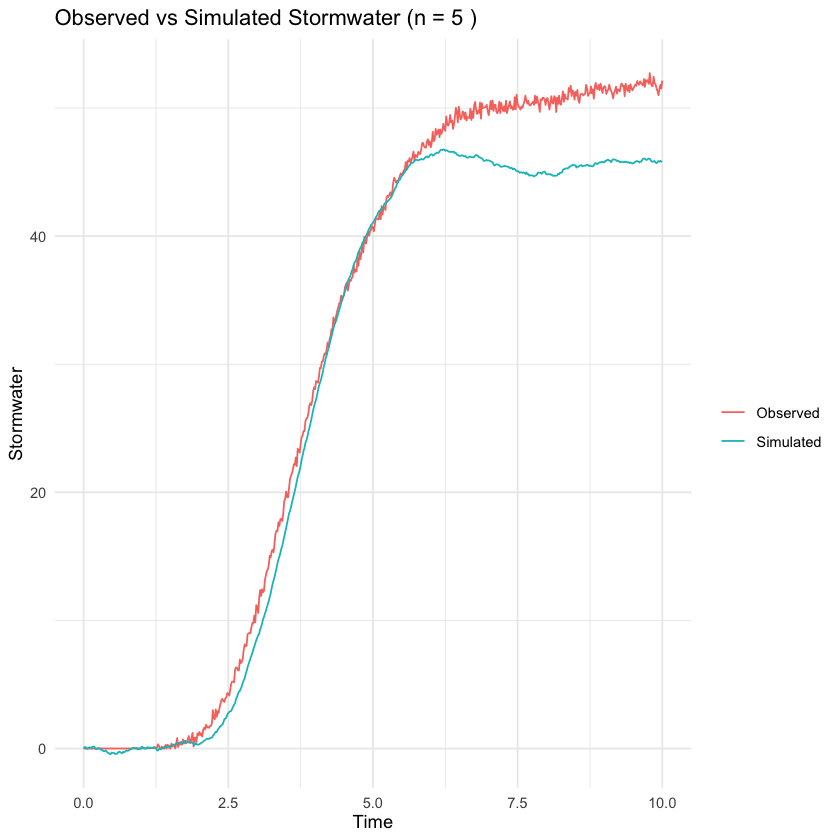

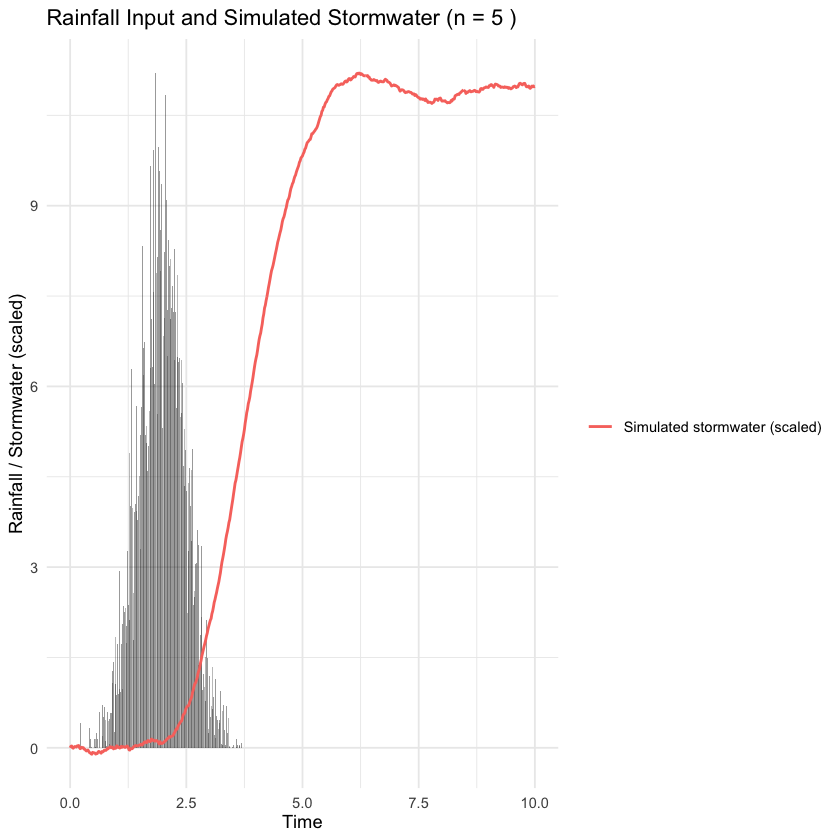

In [180]:
library(ggplot2)

## ---- Choose n and corresponding fitted model -------------------------
# n is the "number of states" in the assignment sense
# n = 1 → 2 reservoirs (X1, X2)
# n = 2 → 3 reservoirs (X1, X2, X3)
# ...
n     <- 5          # set this to 1,2,3,4,5,6 depending on which model
fit_n <- fit5       # set this to the corresponding fit object (fit, fit3, fit4, ...)

data <- ex1_overflow

n_states <- n + 1   # number of reservoirs X1..X_{n+1}
cat("Number of reservoirs (n):", n, "\n")
cat("Number of state variables:", n_states, "\n")

## ---- Coefficients from your ctsmTMB fit ------------------------------
pars    <- fit_n$par
A       <- pars["A"]
K       <- pars["K"]
sigma_x <- pars["sigma_x"]
sigma_y <- pars["sigma_y"]   # not used in the EM sim, but kept for completeness

## ---- Time handling (match what was used in estimation) ---------------
if ("t" %in% names(data)) {
  time <- data$t
} else if ("time" %in% names(data)) {
  time <- data$time
} else if ("timestamp" %in% names(data)) {
  time <- as.numeric(
    difftime(as.POSIXct(data$timestamp),
             as.POSIXct(data$timestamp[1]),
             units = "hours")
  )
} else {
  # fallback: equally spaced index
  time <- seq_len(nrow(data))
}

time_num <- as.numeric(time)
n_t      <- length(time_num)

## ---- Input (rainfall) -------------------------------------------------
rain <- data$rainfall
rain[!is.finite(rain)] <- 0

## ---- State matrix: rows = time, cols = X1..X_{n+1} -------------------
X <- matrix(0, nrow = n_t, ncol = n_states)
colnames(X) <- paste0("X", 1:n_states)

set.seed(123)

## ---- Euler–Maruyama simulation matching your SDE structure -----------
for (i in 2:n_t) {
  dt_i <- time_num[i] - time_num[i - 1]
  stopifnot(is.finite(dt_i) && dt_i > 0)

  # Brownian increments for each state
  dw <- rnorm(n_states, mean = 0, sd = sqrt(dt_i))

  # previous state vector
  X_prev <- X[i - 1, ]

  # 1) First reservoir:
  # dX1 = A * rain - (n/K) * X1 + sigma_x * dW1
  X[i, 1] <- X_prev[1] +
    (A * rain[i] - (n / K) * X_prev[1]) * dt_i +
    sigma_x * dw[1]

  # 2) Middle reservoirs (if any):
  # dXk = (n/K) * X_{k-1} - (n/K) * X_k + sigma_x * dWk,  k = 2,...,n
  if (n_states > 2) {
    for (k in 2:n_states) {
      if (k < n_states) {
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1] - (n / K) * X_prev[k]) * dt_i +
          sigma_x * dw[k]
      } else {
        # 3) Last reservoir X_{n+1}:
        # dX_{n+1} = (n/K) * X_n + sigma_x * dW_{n+1}
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1]) * dt_i +
          sigma_x * dw[k]
      }
    }
  }
}

## ---- Compare last reservoir to observed stormwater -------------------
stormwater_sim <- X[, n_states]

df_plot <- data.frame(
  time      = time_num,
  observed  = data$stormwater,
  simulated = stormwater_sim,
  rainfall  = data$rainfall
)

## ---- Plot 1: Observed vs simulated stormwater ------------------------
ggplot(df_plot, aes(x = time)) +
  geom_line(aes(y = observed,  color = "Observed")) +
  geom_line(aes(y = simulated, color = "Simulated")) +
  labs(title = paste("Observed vs Simulated Stormwater (n =", n, ")"),
       y = "Stormwater", x = "Time", color = "") +
  theme_minimal()

## ---- Plot 2: Rainfall + simulated stormwater -------------------------
sim_scaled <- stormwater_sim / max(stormwater_sim, na.rm = TRUE) *
              max(df_plot$rainfall, na.rm = TRUE)
df_plot$sim_scaled <- sim_scaled

ggplot(df_plot, aes(x = time)) +
  geom_col(aes(y = rainfall), fill = "black", alpha = 0.4) +
  geom_line(aes(y = sim_scaled, color = "Simulated stormwater (scaled)"),
            linewidth = 0.8) +
  labs(title = paste("Rainfall Input and Simulated Stormwater (n =", n, ")"),
       y = "Rainfall / Stormwater (scaled)", x = "Time", color = "") +
  theme_minimal()


In [181]:
# 6 states (n = 6 → 7 reservoirs: X1, X2, X3, X4, X5, X6, X7)

m6 <- ctsmTMB$new()

m6$addSystem(
  dX1 ~ A * rainfall * dt - (6/K) * X1 * dt + sigma_x * dw1,
  dX2 ~ (6/K) * X1 * dt - (6/K) * X2 * dt + sigma_x * dw2,
  dX3 ~ (6/K) * X2 * dt - (6/K) * X3 * dt + sigma_x * dw3,
  dX4 ~ (6/K) * X3 * dt - (6/K) * X4 * dt + sigma_x * dw4,
  dX5 ~ (6/K) * X4 * dt - (6/K) * X5 * dt + sigma_x * dw5,
  dX6 ~ (6/K) * X5 * dt - (6/K) * X6 * dt + sigma_x * dw6,
  dX7 ~ (6/K) * X6 * dt                 + sigma_x * dw7
)
m6$addObs(stormwater ~ X7)
m6$setVariance(stormwater ~ sigma_y^2)
m6$addInput(rainfall)

m6$setParameter(
  A       = c(initial = 1,   lower = 1e-6, upper = 1e3),
  K       = c(initial = 10,  lower = 1e-6, upper = 1e4),
  sigma_x = c(initial = 0.1, lower = 1e-8, upper = 10),
  sigma_y = c(initial = 0.1, lower = 1e-8, upper = 10)
)

# Proper initial state specification (mean + covariance)
m6$setInitialState(list(
  x0 = c(X1 = 0, X2 = 0, X3 = 0, X4 = 0, X5 = 0, X6 = 0, X7 = 0),
  p0 = diag(7) * 0.01
))

fit6 <- m6$estimate(data = ex1_overflow)

summary(fit6)

loglik_val6 <- fit6$getLikelihood
cat("\nLogLik (n=6):", loglik_val6, "\n")
cat("K:", fit6$par["K"], "  A:", fit6$par["A"], "\n")


Checking model components...

Checking and setting data...

Constructing objective function and derivative tables...

Minimizing the negative log-likelihood...



  0:     16003.410:  1.00000  10.0000 0.100000 0.100000
 10:     234.65092: 0.785051  2.86413  1.42719 0.260315
 20:     173.91726:  4.36759  1.87436 0.523437 0.285828


	 Optimization finished!:
            Elapsed time: 0.263 seconds.
            The objective value is: 1.731686e+02
            The maximum gradient component is: 8.6e-05
            The convergence message is: relative convergence (4)
            Iterations: 28
            Evaluations: Fun: 48 Grad: 29
            See stats::nlminb for available tolerance/control arguments.

Returning results...

Finished!



Coefficent Matrix 
         Estimate Std. Error t value  Pr(>|t|)    
A       4.1160452  0.2192206 18.7758 < 2.2e-16 ***
K       1.8613963  0.0733743 25.3685 < 2.2e-16 ***
sigma_x 0.4981073  0.0528028  9.4334 < 2.2e-16 ***
sigma_y 0.2839308  0.0090026 31.5388 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

LogLik (n=6): 
K: 1.861396   A: 4.116045 


Number of reservoirs (n): 6 


Number of state variables: 7 


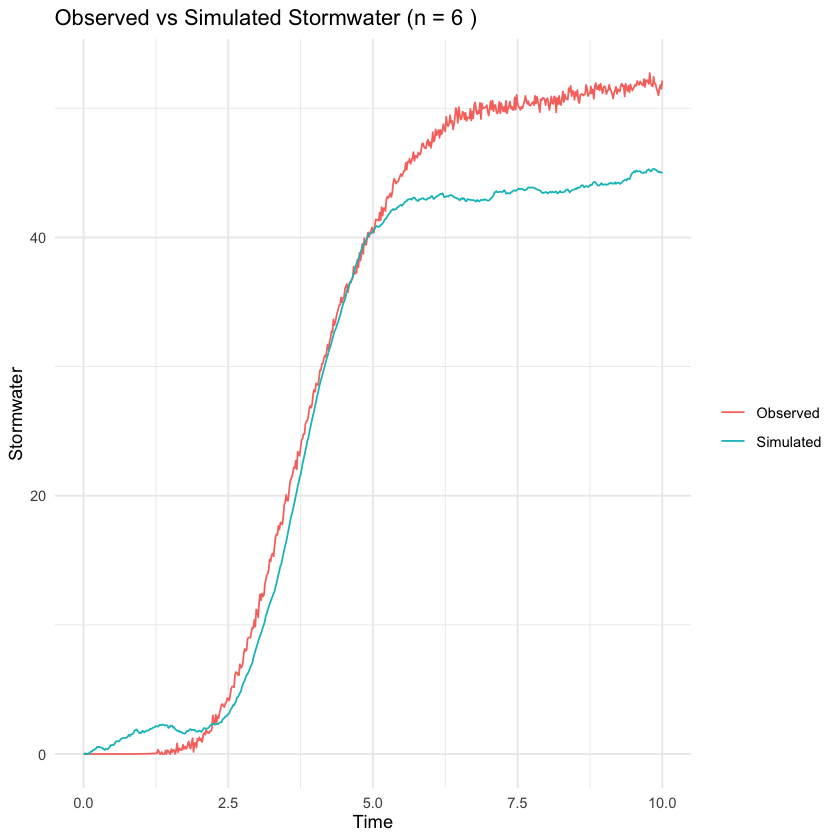

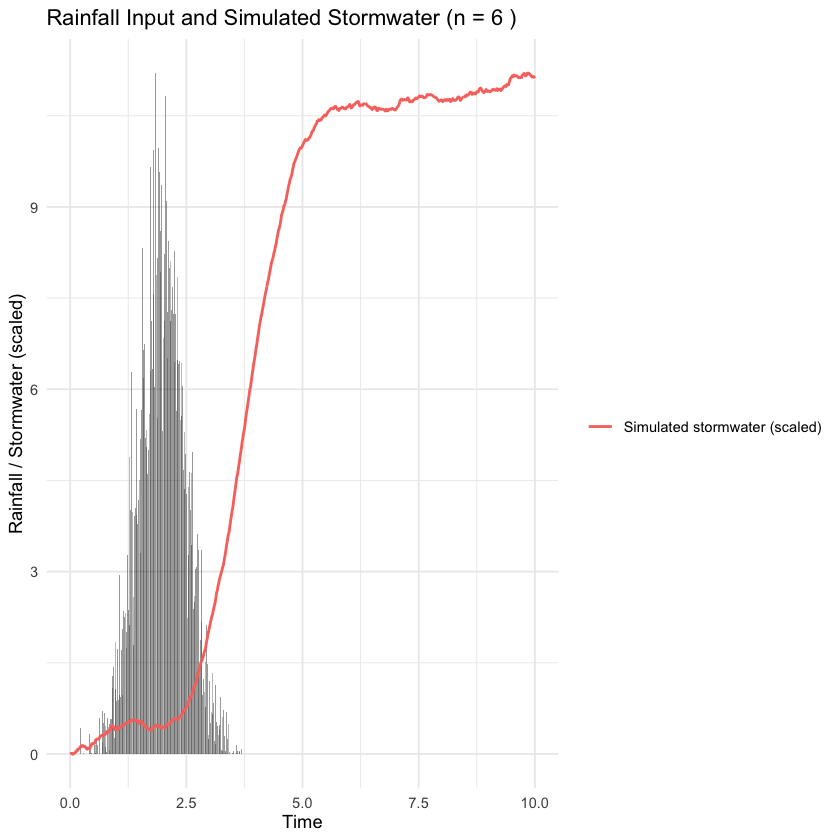

In [182]:
library(ggplot2)

## ---- Choose n and corresponding fitted model -------------------------
# n is the "number of states" in the assignment sense
# n = 1 → 2 reservoirs (X1, X2)
# n = 2 → 3 reservoirs (X1, X2, X3)
# ...
n     <- 6          # set this to 1,2,3,4,5,6 depending on which model
fit_n <- fit6       # set this to the corresponding fit object (fit, fit3, fit4, ...)

data <- ex1_overflow

n_states <- n + 1   # number of reservoirs X1..X_{n+1}
cat("Number of reservoirs (n):", n, "\n")
cat("Number of state variables:", n_states, "\n")

## ---- Coefficients from your ctsmTMB fit ------------------------------
pars    <- fit_n$par
A       <- pars["A"]
K       <- pars["K"]
sigma_x <- pars["sigma_x"]
sigma_y <- pars["sigma_y"]   # not used in the EM sim, but kept for completeness

## ---- Time handling (match what was used in estimation) ---------------
if ("t" %in% names(data)) {
  time <- data$t
} else if ("time" %in% names(data)) {
  time <- data$time
} else if ("timestamp" %in% names(data)) {
  time <- as.numeric(
    difftime(as.POSIXct(data$timestamp),
             as.POSIXct(data$timestamp[1]),
             units = "hours")
  )
} else {
  # fallback: equally spaced index
  time <- seq_len(nrow(data))
}

time_num <- as.numeric(time)
n_t      <- length(time_num)

## ---- Input (rainfall) -------------------------------------------------
rain <- data$rainfall
rain[!is.finite(rain)] <- 0

## ---- State matrix: rows = time, cols = X1..X_{n+1} -------------------
X <- matrix(0, nrow = n_t, ncol = n_states)
colnames(X) <- paste0("X", 1:n_states)

set.seed(123)

## ---- Euler–Maruyama simulation matching your SDE structure -----------
for (i in 2:n_t) {
  dt_i <- time_num[i] - time_num[i - 1]
  stopifnot(is.finite(dt_i) && dt_i > 0)

  # Brownian increments for each state
  dw <- rnorm(n_states, mean = 0, sd = sqrt(dt_i))

  # previous state vector
  X_prev <- X[i - 1, ]

  # 1) First reservoir:
  # dX1 = A * rain - (n/K) * X1 + sigma_x * dW1
  X[i, 1] <- X_prev[1] +
    (A * rain[i] - (n / K) * X_prev[1]) * dt_i +
    sigma_x * dw[1]

  # 2) Middle reservoirs (if any):
  # dXk = (n/K) * X_{k-1} - (n/K) * X_k + sigma_x * dWk,  k = 2,...,n
  if (n_states > 2) {
    for (k in 2:n_states) {
      if (k < n_states) {
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1] - (n / K) * X_prev[k]) * dt_i +
          sigma_x * dw[k]
      } else {
        # 3) Last reservoir X_{n+1}:
        # dX_{n+1} = (n/K) * X_n + sigma_x * dW_{n+1}
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1]) * dt_i +
          sigma_x * dw[k]
      }
    }
  }
}

## ---- Compare last reservoir to observed stormwater -------------------
stormwater_sim <- X[, n_states]

df_plot <- data.frame(
  time      = time_num,
  observed  = data$stormwater,
  simulated = stormwater_sim,
  rainfall  = data$rainfall
)

## ---- Plot 1: Observed vs simulated stormwater ------------------------
ggplot(df_plot, aes(x = time)) +
  geom_line(aes(y = observed,  color = "Observed")) +
  geom_line(aes(y = simulated, color = "Simulated")) +
  labs(title = paste("Observed vs Simulated Stormwater (n =", n, ")"),
       y = "Stormwater", x = "Time", color = "") +
  theme_minimal()

## ---- Plot 2: Rainfall + simulated stormwater -------------------------
sim_scaled <- stormwater_sim / max(stormwater_sim, na.rm = TRUE) *
              max(df_plot$rainfall, na.rm = TRUE)
df_plot$sim_scaled <- sim_scaled

ggplot(df_plot, aes(x = time)) +
  geom_col(aes(y = rainfall), fill = "black", alpha = 0.4) +
  geom_line(aes(y = sim_scaled, color = "Simulated stormwater (scaled)"),
            linewidth = 0.8) +
  labs(title = paste("Rainfall Input and Simulated Stormwater (n =", n, ")"),
       y = "Rainfall / Stormwater (scaled)", x = "Time", color = "") +
  theme_minimal()


In [183]:
# negative log likelihood
-f$nll

[1] -167.6739

In [185]:
models <- list(
  n1 = fit,   # rename if needed
  n2 = fit2,
  n3 = fit3,
  n4 = fit4,
  n5 = fit5,
  n6 = fit6
)

# ---- Data used in fitting ----
n_obs <- nrow(ex1_overflow)

# ---- Function to extract metrics for one model ----
extract_ic <- function(fit, n) {
  
  # log-likelihood
  ll <- -fit$nll
  
  # number of free parameters
  k <- length(fit$par)
  
  # AIC & BIC
  AIC_val <- -2 * ll + 2 * k
  BIC_val <- -2 * ll + log(n_obs) * k
  
  data.frame(
    states = n,
    logLik = ll,
    # k      = k,
    AIC    = AIC_val,
    BIC    = BIC_val
  )
}

# ---- Loop over models and bind results ----
results <- do.call(
  rbind,
  lapply(seq_along(models), function(i) {
    extract_ic(models[[i]], n = i)
  })
)

# ---- Print nicely ----
print(results)


  states    logLik      AIC      BIC
1      1 -217.6268 443.2537 460.8480
2      2 -167.6739 343.3479 360.9423
3      3 -150.8462 309.6923 327.2867
4      4 -160.8798 329.7596 347.3540
5      5 -168.4285 344.8570 362.4514
6      6 -173.1686 354.3372 371.9316


### Model Selection for the Extended Linear Reservoir (Task 2.1.2)

We estimated linear reservoir cascade models with 1–6 states (i.e., 1–6 storage layers feeding each other) and compared them using likelihood-based information criteria. Importantly, all models estimated the same four parameters \((A, K, \sigma_x, \sigma_y)\); adding states increases system dimensionality but does **not** increase the number of estimated parameters. This means that AIC/BIC differences come entirely from improvements in the log-likelihood, not from added parameter penalty.

The log-likelihood improved substantially when increasing the number of states from 1 → 2 → 3, and the AIC decreased correspondingly, reaching its minimum at **3 states**, indicating that this model provides the best fit within the tested range. Beyond 3 states, the likelihood began to deteriorate and AIC/BIC both increased, suggesting that additional states do not improve explanatory power and instead introduce unnecessary system complexity. Thus, based on both AIC and BIC, the **3-state linear reservoir** is the most suitable model for this dataset.

Overall, the model selection analysis shows that while increasing the number of reservoirs initially improves the fit, the benefit peaks at three states. Additional reservoirs do not meaningfully improve model performance and are penalized by information criteria, confirming that **a 3-state model provides the optimal balance between parsimony and predictive accuracy**.


## 2.1.3

The model with best fit, selected by the having both lowest AIC and BIC, was the model cmprised of 3 states. The reported parameters are $K=2.06$ and $A=5.06$. In contrast, the two state model produced $K=2.98$ and $A=6.24$. The differences are expected: when additional states are introduced, the system gains extra internal storage capacity and becomes more flexible in how it represents water delays. As a result, the upstream inflow coefficient $A$ decreases, because the model no longer needs such a strong immediate response to rainfall—part of that response is now absorbed by the intermediate reservoirs. Similarly, $K$ decreases because a multi-state cascade drains more slowly overall; the effective outflow rate per reservoir becomes smaller to match the observed recession behaviour. In short, adding states redistributes the dynamic behaviour across more compartments, leading to lower $A$ and $K$ values in the 3-state model while improving the model’s realism and fit.

When the number of states is increased beyond three, the model becomes too flexible relative to the information content in the data. Each additional reservoir introduces another smoothing/delay component, but the observed stormwater signal does not contain enough dynamic structure to justify more compartments. As a result, the likelihood barely improves, while the penalty term in AIC/BIC increases, leading to worse information criteria.
Dynamically, models with four or more states tend to “over-delay’’ the runoff response: the extra reservoirs spread the rainfall pulse too much in time, producing a simulated hydrograph that rises too slowly and loses the sharp curvature seen in the observations. This indicates overfitting—extra states absorb variance rather than capturing meaningful hydrological processes. Thus, although a higher-order cascade can mathematically fit the data, it does so in a way that is neither parsimonious nor physically interpretable, which is why the performance deteriorates beyond three states.

## 2.1.4

In [ ]:
f <- fit3

cov_mat <- f$cov.fixed

cor_mat <- cov2cor(cov_mat)

round(cor_mat, 3)


,A,K,sigma_x,sigma_y
A,1.000,0.414,0.005,-0.001
K,0.414,1.000,0.013,-0.002
sigma_x,0.005,0.013,1.000,-0.217
sigma_y,-0.001,-0.002,-0.217,1.000


The correlation matrix of the estimated parameters shows a moderate positive correlation between the rainfall gain \(A\) and the storage constant \(K\) (\(\rho = 0.414\)). This indicates partial confounding: a stronger input response (larger \(A\)) can be compensated by a faster drainage rate (larger \(K\)) to produce a similar stormwater trajectory. This trade-off is common in linear reservoir cascades and reflects that both parameters influence the timing and magnitude of the hydrograph rise.

The process noise parameter \(\sigma_x\) is almost uncorrelated with the hydrological parameters (\(|\rho| < 0.02\)), suggesting that stochastic variability in the state dynamics is well separated from the deterministic structure of the model. In contrast, \(\sigma_y\), the measurement noise, shows a moderate negative correlation with \(\sigma_x\) (\(\rho = -0.217\)), consistent with the usual competition between attributing short-term variability to process noise vs. observation noise. Importantly, \(\sigma_y\) is essentially uncorrelated with \(A\) and \(K\), confirming that measurement uncertainty does not distort the interpretation of the system’s physical parameters.


## 2.1.5

Number of reservoirs (n): 3 
Number of state variables: 4 


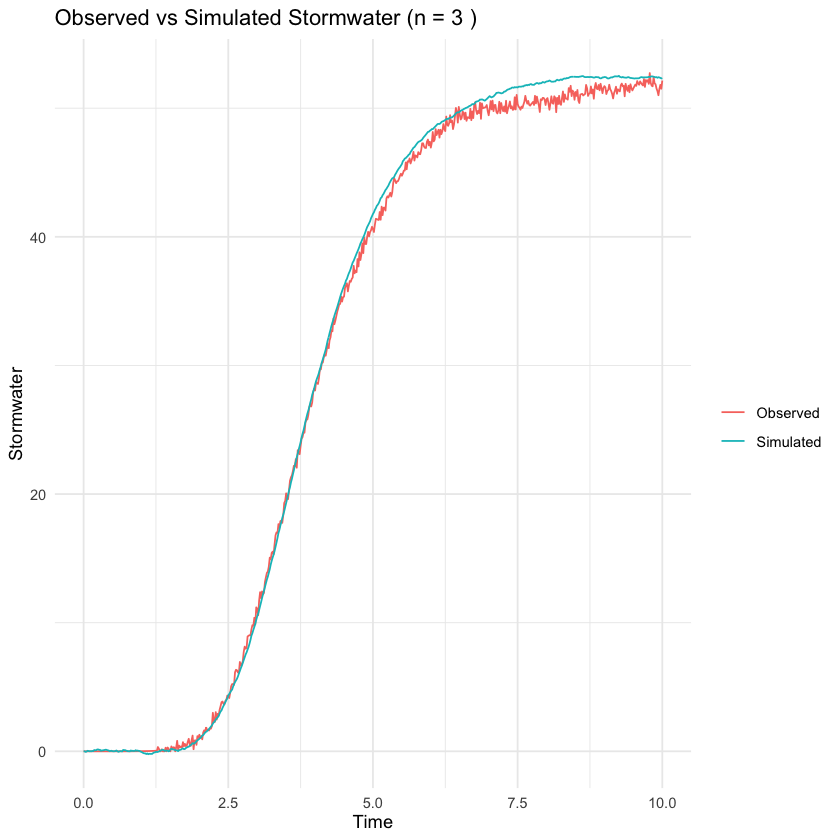

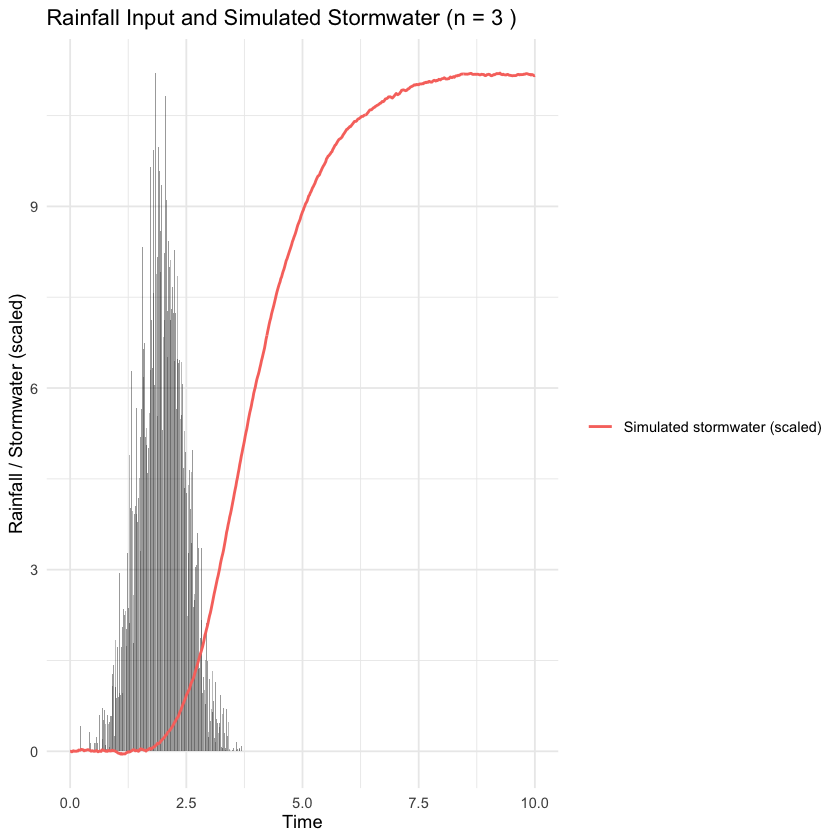

In [193]:
library(ggplot2)

## ---- Choose n and corresponding fitted model -------------------------
# n is the "number of states" in the assignment sense
# n = 1 → 2 reservoirs (X1, X2)
# n = 2 → 3 reservoirs (X1, X2, X3)
# ...
n     <- 3          # set this to 1,2,3,4,5,6 depending on which model
fit_n <- fit3       # set this to the corresponding fit object (fit, fit3, fit4, ...)

data <- ex1_overflow

n_states <- n + 1   # number of reservoirs X1..X_{n+1}
cat("Number of reservoirs (n):", n, "\n")
cat("Number of state variables:", n_states, "\n")

## ---- Coefficients from your ctsmTMB fit ------------------------------
pars    <- fit_n$par
A       <- pars["A"]
K       <- pars["K"]
sigma_x <- pars["sigma_x"]
sigma_y <- pars["sigma_y"]   # not used in the EM sim, but kept for completeness

## ---- Time handling (match what was used in estimation) ---------------
if ("t" %in% names(data)) {
  time <- data$t
} else if ("time" %in% names(data)) {
  time <- data$time
} else if ("timestamp" %in% names(data)) {
  time <- as.numeric(
    difftime(as.POSIXct(data$timestamp),
             as.POSIXct(data$timestamp[1]),
             units = "hours")
  )
} else {
  # fallback: equally spaced index
  time <- seq_len(nrow(data))
}

time_num <- as.numeric(time)
n_t      <- length(time_num)

## ---- Input (rainfall) -------------------------------------------------
rain <- data$rainfall
rain[!is.finite(rain)] <- 0

## ---- State matrix: rows = time, cols = X1..X_{n+1} -------------------
X <- matrix(0, nrow = n_t, ncol = n_states)
colnames(X) <- paste0("X", 1:n_states)

set.seed(123)

## ---- Euler–Maruyama simulation matching your SDE structure -----------
for (i in 2:n_t) {
  dt_i <- time_num[i] - time_num[i - 1]
  stopifnot(is.finite(dt_i) && dt_i > 0)

  # Brownian increments for each state
  dw <- rnorm(n_states, mean = 0, sd = sqrt(dt_i))

  # previous state vector
  X_prev <- X[i - 1, ]

  # 1) First reservoir:
  # dX1 = A * rain - (n/K) * X1 + sigma_x * dW1
  X[i, 1] <- X_prev[1] +
    (A * rain[i] - (n / K) * X_prev[1]) * dt_i +
    sigma_x * dw[1]

  # 2) Middle reservoirs (if any):
  # dXk = (n/K) * X_{k-1} - (n/K) * X_k + sigma_x * dWk,  k = 2,...,n
  if (n_states > 2) {
    for (k in 2:n_states) {
      if (k < n_states) {
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1] - (n / K) * X_prev[k]) * dt_i +
          sigma_x * dw[k]
      } else {
        # 3) Last reservoir X_{n+1}:
        # dX_{n+1} = (n/K) * X_n + sigma_x * dW_{n+1}
        X[i, k] <- X_prev[k] +
          ((n / K) * X_prev[k - 1]) * dt_i +
          sigma_x * dw[k]
      }
    }
  }
}

## ---- Compare last reservoir to observed stormwater -------------------
stormwater_sim <- X[, n_states]

df_plot <- data.frame(
  time      = time_num,
  observed  = data$stormwater,
  simulated = stormwater_sim,
  rainfall  = data$rainfall
)

## ---- Plot 1: Observed vs simulated stormwater ------------------------
ggplot(df_plot, aes(x = time)) +
  geom_line(aes(y = observed,  color = "Observed")) +
  geom_line(aes(y = simulated, color = "Simulated")) +
  labs(title = paste("Observed vs Simulated Stormwater (n =", n, ")"),
       y = "Stormwater", x = "Time", color = "") +
  theme_minimal()

## ---- Plot 2: Rainfall + simulated stormwater -------------------------
sim_scaled <- stormwater_sim / max(stormwater_sim, na.rm = TRUE) *
              max(df_plot$rainfall, na.rm = TRUE)
df_plot$sim_scaled <- sim_scaled

ggplot(df_plot, aes(x = time)) +
  geom_col(aes(y = rainfall), fill = "black", alpha = 0.4) +
  geom_line(aes(y = sim_scaled, color = "Simulated stormwater (scaled)"),
            linewidth = 0.8) +
  labs(title = paste("Rainfall Input and Simulated Stormwater (n =", n, ")"),
       y = "Rainfall / Stormwater (scaled)", x = "Time", color = "") +
  theme_minimal()


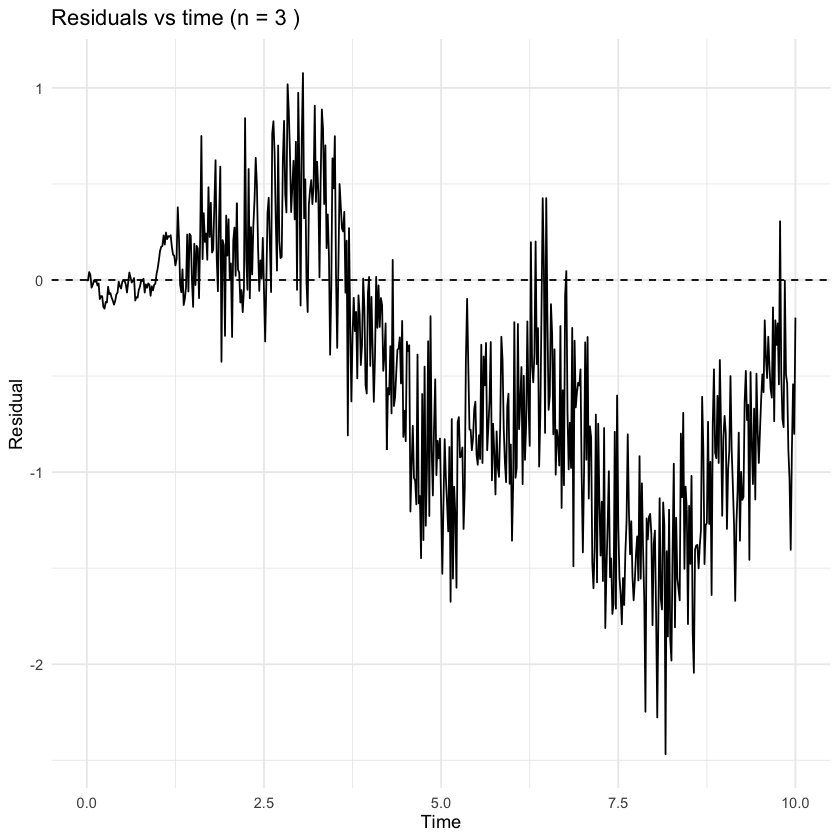

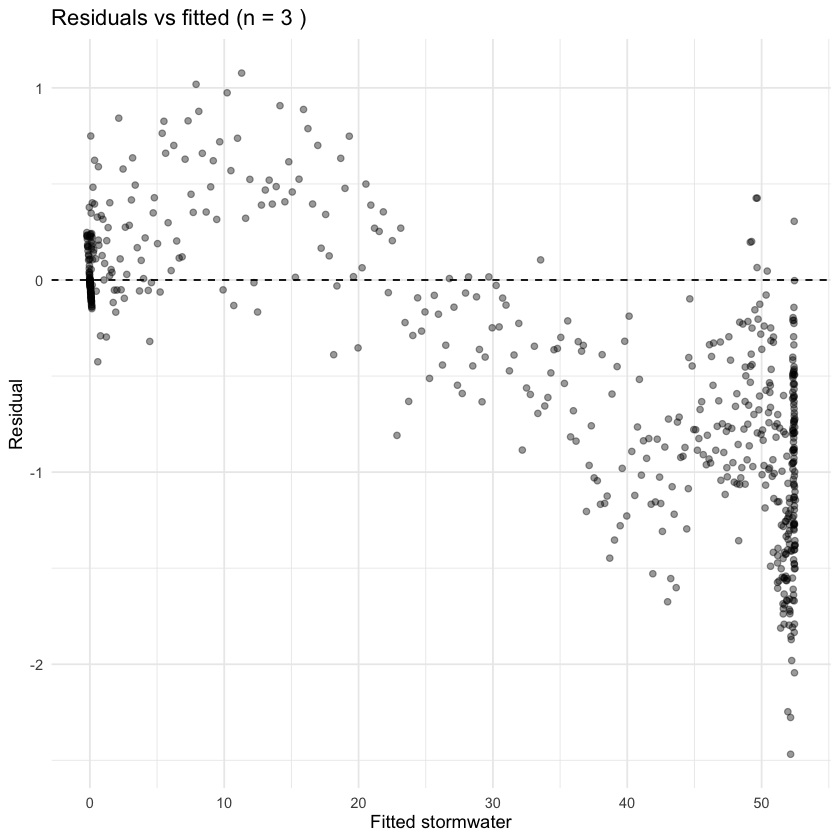

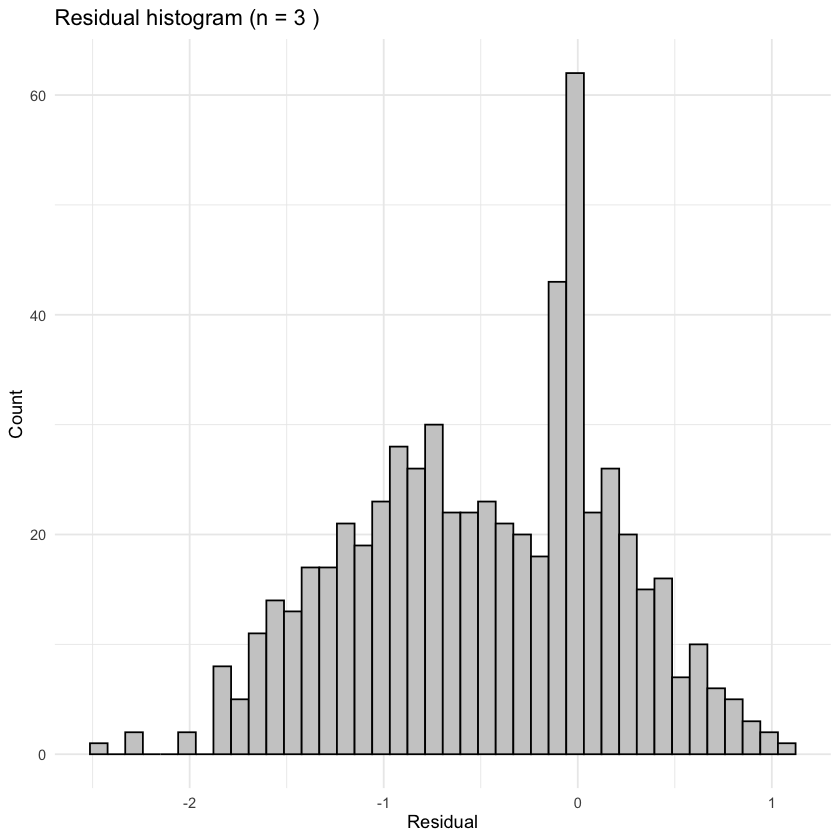

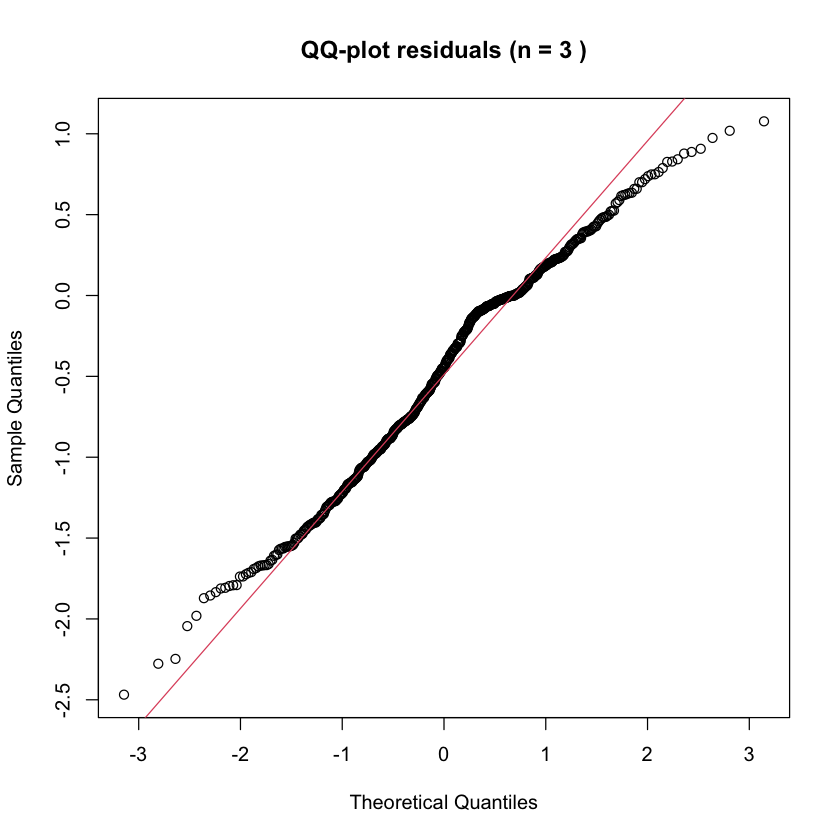

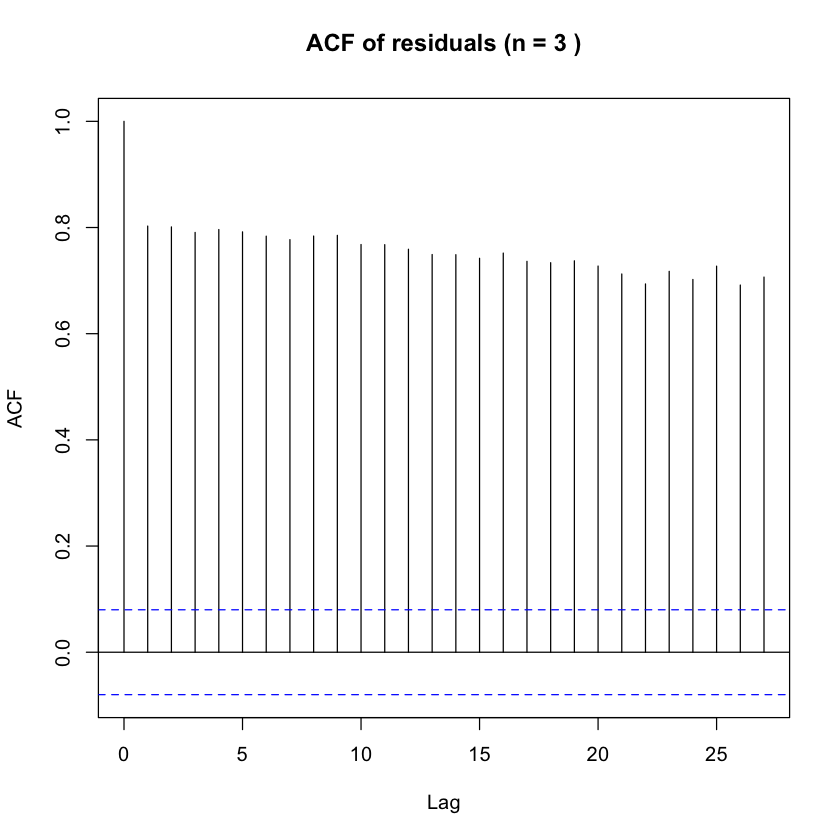

In [ ]:
# 1) Compute residuals (obs - model)
df_plot$residual <- df_plot$observed - df_plot$simulated

# 2) Residuals vs time
ggplot(df_plot, aes(x = time_num, y = residual)) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_line() +
  labs(title = paste("Residuals vs time (n =", n, ")"),
       x = "Time", y = "Residual") +
  theme_minimal()

# 3) Residuals vs fitted (check for heteroscedasticity / nonlinearity)
ggplot(df_plot, aes(x = simulated, y = residual)) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_point(alpha = 0.4) +
  labs(title = paste("Residuals vs fitted (n =", n, ")"),
       x = "Fitted stormwater", y = "Residual") +
  theme_minimal()

# 4) Histogram of residuals (approx normal?)
ggplot(df_plot, aes(x = residual)) +
  geom_histogram(bins = 40, colour = "black", fill = "grey80") +
  labs(title = paste("Residual histogram (n =", n, ")"),
       x = "Residual", y = "Count") +
  theme_minimal()

# 5) QQ-plot against normal
qqnorm(df_plot$residual, main = paste("QQ-plot residuals (n =", n, ")"))
qqline(df_plot$residual, col = 2)

# 6) Autocorrelation function (should be ~0 for k>0)
acf(df_plot$residual, main = paste("ACF of residuals (n =", n, ")"))
